بِسْمِ ٱللَّٰهِ ٱلرَّحْمَٰنِ ٱلرَّحِيمِ

# Milestones 2 Phase 2

# Sentiment Analysis of Amazon Customer Reviews




[Dataset](https://www.kaggle.com/datasets/yacharki/amazon-reviews-for-sa-binary-negative-positive-csv)

[Deployment](https://huggingface.co/spaces/ahmadluay/Amazon_Customer_Reviews)

---

# 1 - Introduction

> This section contains identity, background, and objective.

- Ahmad Luay Adnani
- Batch: FTDS-018-RMT

## 1.1 Background

Amazon is one of the largest e-commerce platforms in the world, with millions of products available for purchase and billions of reviews submitted by customers. The reviews can vary in length, tone, and style, and often contain sarcasm, irony, or other forms of nuanced language. Sentiment analysis on Amazon reviews can **provide valuable insights for businesses**, including identifying common issues that customers face with their products or services, understanding the factors that drive customer satisfaction, and tracking changes in customer sentiment over time.

## 1.2 Objective

The objective of this analysis is to **accurately classify the sentiment expressed** in customer reviews as either positive or negative. This helps to understand the overall opinion and satisfaction of customers towards a particular product or service. The primary goal is to achieve high **accuracy** in the classification of sentiment. High accuracy indicates that the model is able to correctly classify the sentiment expressed in the reviews, which can be used to make informed decisions regarding product development, marketing strategies, and customer support.

---

# 2 - Import Libraries

> This section contains the process of importing libraries and checking the version of the libraries.

## 2.1 Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

# Split Dataset
import sklearn
from sklearn.model_selection import train_test_split

# Library Pre-Processing
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import string
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Library wordcloud
from wordcloud import WordCloud

# Library Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, Activation, LSTM, GRU, TextVectorization, Embedding
from tensorflow.keras import Model 
import tensorflow_hub as hub

# Model Evaluation
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from collections import Counter

# model saving
import pickle

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
# library version
print('pandas version :',(pd.__version__))
print('numpy version :',(np.__version__))
print('matplotlib version :',(matplotlib.__version__))
print('seaborn version :',(sns.__version__))
print('plotly version :',(plotly.__version__))
print('scikit-learn version :',(sklearn.__version__))
print('tensorflow version :',(tf.__version__))

pandas version : 1.4.4
numpy version : 1.22.4
matplotlib version : 3.7.1
seaborn version : 0.12.2
plotly version : 5.13.1
scikit-learn version : 1.2.2
tensorflow version : 2.12.0


---

# 3 - Data Loading

> This section explains the data preparation process prior to further data exploration. The data preparation process carried out in this section includes the process of data loading, checking the size of the dataset, displaying information of the dataset, and checking for duplicated entries.

## 3.1 Data Loading

This section explains the process of data loading. Dataset used is amazon review dataset `test.csv`. In the dataset, class 1 is the **negative** and class 2 is the **positive**.

In [3]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# create directory
!mkdir ~/.kaggle

# !cp 'kaggle.json' ~/.kaggle
!cp '/content/drive/MyDrive/kaggle.json' ~/.kaggle

!ls ~/.kaggle

kaggle.json


In [5]:
# dataset download
!kaggle datasets download -d yacharki/amazon-reviews-for-sa-binary-negative-positive-csv

100% 667M/667M [00:07<00:00, 132MB/s]
100% 667M/667M [00:07<00:00, 94.5MB/s]


In [6]:
# unzip
!unzip -q /content/amazon-reviews-for-sa-binary-negative-positive-csv.zip

In [7]:
# data loading
df= pd.read_csv('/content/amazon_review_sa_binary_csv/test.csv')

In [8]:
# Displaying the top 10 rows of the dataset
df.head(10)

,class_index,review_title,review_text
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
5,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...
6,1,Incorrect Disc,"I love the style of this, but after a couple y..."
7,1,DVD menu select problems,I cannot scroll through a DVD menu that is set...
8,2,Unique Weird Orientalia from the 1930's,"Exotic tales of the Orient from the 1930's. ""D..."
9,1,"Not an ""ultimate guide""","Firstly,I enjoyed the format and tone of the b..."


In [9]:
# Displaying the bottom 10 rows of the dataset
df.tail(10)

,class_index,review_title,review_text
399990,2,I really love Puff Daddy and R. Kelly's songs.,I'm so happy they made this song together beca...
399991,1,Very Disappointed,"I expected more about how to create luck, mayb..."
399992,1,"Strange but, listenable",This is not what I expected. I thought this wa...
399993,1,CRAP,"this is not music, no matter what anyone says...."
399994,2,Obey the warning,This is a fun toy and my 2 and 6 year olds lov...
399995,1,Unbelievable- In a Bad Way,We bought this Thomas for our son who is a hug...
399996,1,"Almost Great, Until it Broke...",My son recieved this as a birthday gift 2 mont...
399997,1,Disappointed !!!,"I bought this toy for my son who loves the ""Th..."
399998,2,Classic Jessica Mitford,This is a compilation of a wide range of Mitfo...
399999,1,"Comedy Scene, and Not Heard",This DVD will be a disappointment if you get i...


## 3.2 Size of Dataset

This section explains how to check the size of the dataset.

In [10]:
# size of dataset
df.shape

(400000, 3)

## 3.3 Create sample datasets

Because the number of datasets is too large, several samples are taken to avoid long computation times and excessive storage requirements. We took 25,000 samples for positive reviews and 25,000 for negative reviews, as the original dataset had balanced targets.

In [24]:
# Separating positive & negative review
positive = df[df['class_index']==2]
negative = df[df['class_index']==1]

In [25]:
# sampling
positive = positive.sample(25000, random_state=46).sort_index()
negative = negative.sample(25000, random_state=48).sort_index()

In [26]:
# concat the dataframe
data = [positive,negative]
df2 = pd.concat(data)

In [27]:
# shuffle
df2 = df2.sample(20000,random_state=99).reset_index(drop=True)
df2

,class_index,review_title,review_text
0,2,Not what I expected,Great book - but beware that this is the mini ...
1,2,Listening to this soundtrack is a journey like...,"Ok, so I'm plagiarizing the Venice Simplon Ori..."
2,2,Best lube ever!,This lube is great for any purpose. My wife an...
3,2,I would highly recommend this product. My face...,I would highly recommend this product. My face...
4,2,Keeps them busy!,I bought a dozen of these for the goody bags f...
...,...,...,...
19995,1,Slasher films shouldn't be considered horror,Scream 2 is an example of how bad the slasher ...
19996,2,serenity,Excellent Halperin CD. You can get lost in the...
19997,1,The agenda,The screenplay in this movie was written to ad...
19998,2,One of the Funk Mob's 80's finest,"All the tracks on this album are great, but tr..."


In [28]:
# save_to_csv
df2.to_csv('dataset_50000_rows.csv')

## 3.4 Information

This section explains the information contained in the dataset, including the index, columns, data type, non-null values, and memory usage.

In [29]:
# showing information from the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   class_index   20000 non-null  int64 
 1   review_title  20000 non-null  object
 2   review_text   20000 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.9+ KB


## 3.5 Checking for Duplicated Data

This section explains the process to check for duplicated data in the dataset.

In [30]:
# Check for duplicated entries
df2.duplicated().value_counts()

False    20000
dtype: int64

There are no duplicated data in this dataset.

---

# 4 - Exploratory Data Analysis

> This section contains data exploration of the dataset. Data exploration carried out to find out the type of review, examples of positive and negative review, number of words on each type of review and Wordcloud. 

## 4.1 Type of Review

In this section, data exploration is carried out to find out the number of negative reviews and positive reviews.

In [31]:
# create a copy of the dataframe
df_eda = df2.copy()
df_eda.class_index.replace({1:'Negative Review',2:'Positive Review'}, inplace=True)

In [32]:
# type of review
review = df_eda['class_index'].value_counts().to_frame().reset_index()
review

,index,class_index
0,Negative Review,10025
1,Positive Review,9975


In [33]:
# Plot PieChart with Plotly
fig = px.pie(review,values='class_index', names='index',color_discrete_sequence=['red','blue'])
fig.update_layout(title_text = "Type of Review")
fig.show()

Based on the table and visualization above, it can be seen that both negative and positive reviews consist of 25,000 reviews each.

## 4.2 Examples of positive and negative reviews

In this section, data exploration is carried out to identify examples of positive and negative reviews.

In [34]:
# Print sample reviews
pd.set_option('display.width', None)
sample_negative_review = df_eda[df_eda['class_index']=='Negative Review'].sample(20)
sample_positive_review = df_eda[df_eda['class_index']=='Positive Review'].sample(20)

# Print Sample of Negative Review
print('Example of Negative Reviews')
print('-'*100)
for i in range(0,20):
    print(sample_negative_review.iloc[i,2])
print('-'*100)

# Print Sample of Positive Review
print('Example of Positive Reviews')
print('-'*100)
for i in range(0,20):
    print(sample_positive_review.iloc[i,2])
print('-'*100)

Example of Negative Reviews
----------------------------------------------------------------------------------------------------
If I had read some of the reviews I would never had purchased the book. When I looked at it closely I realized that it was something I really couldn't use because it did not include the up to date building requirements. If the title shown had mentioned 1932 edition it would have helped in my decsion whether to purchase the book or not. One thing I learned was that I need to check and double check before I purchase.
Let me first say that I initially LOVED this phone, however - don't buy this phone! We've had it for less than a year and the charge that it will hold gets less and less every day. We're down to less than five minutes when not cradled. I'm currently replacing this phone!
Pearl Harbor...December 7th...a date which will live in infamy. This film took on a subject near and dear to the hearts of Americans everywhere, and failed to do it justice. Fantas

Based on the examples of various reviews above, what distinguishes between positive reviews and negative reviews :

1. **Positive reviews** generally express satisfaction with a product, service, or experience, highlighting the positive aspects and benefits that were experienced. They often use positive language and may include specific examples of what the reviewer liked about the product or service. They may also mention the quality, value for money, or ease of use.

2. **Negative reviews**, on the other hand, typically express dissatisfaction or disappointment with a product, service, or experience. They often highlight specific problems or issues that the reviewer experienced, such as poor quality, bad customer service, or difficulty using the product. Negative reviews may use negative language and may also include suggestions for how the product or service could be improved.

Overall, the key difference between positive and negative reviews is the attitude of the reviewer and their overall satisfaction with the product or service. Positive reviews reflect a positive experience, while negative reviews reflect a negative experience.


## 4.3 Number of Words

In this section, data exploration is carried out to find out the number of words on each review.

In [35]:
# Count the number of words in each review
df_eda['len_words'] = df_eda['review_text'].apply(lambda x: len(nltk.word_tokenize(x)))
df_eda

,class_index,review_title,review_text,len_words
0,Positive Review,Not what I expected,Great book - but beware that this is the mini ...,32
1,Positive Review,Listening to this soundtrack is a journey like...,"Ok, so I'm plagiarizing the Venice Simplon Ori...",68
2,Positive Review,Best lube ever!,This lube is great for any purpose. My wife an...,74
3,Positive Review,I would highly recommend this product. My face...,I would highly recommend this product. My face...,73
4,Positive Review,Keeps them busy!,I bought a dozen of these for the goody bags f...,58
...,...,...,...,...
19995,Negative Review,Slasher films shouldn't be considered horror,Scream 2 is an example of how bad the slasher ...,105
19996,Positive Review,serenity,Excellent Halperin CD. You can get lost in the...,24
19997,Negative Review,The agenda,The screenplay in this movie was written to ad...,84
19998,Positive Review,One of the Funk Mob's 80's finest,"All the tracks on this album are great, but tr...",72


In [36]:
# Print Max and Average number of words

print('The maximum number of words on each review is ', df_eda['len_words'].max())
print('The average number of words on each review is', df_eda['len_words'].mean())

The maximum number of words on each review is  250
The average number of words on each review is 85.10595


- The maximum number of words on each review is  239 words.
- The average number of words on each review is 84.97 words.

In [37]:
# Separating positive & negative review
positive_review = df_eda[df_eda['class_index']=='Positive Review']
negative_review = df_eda[df_eda['class_index']=='Negative Review']

Text(0.5, 1.0, 'Negative Review')

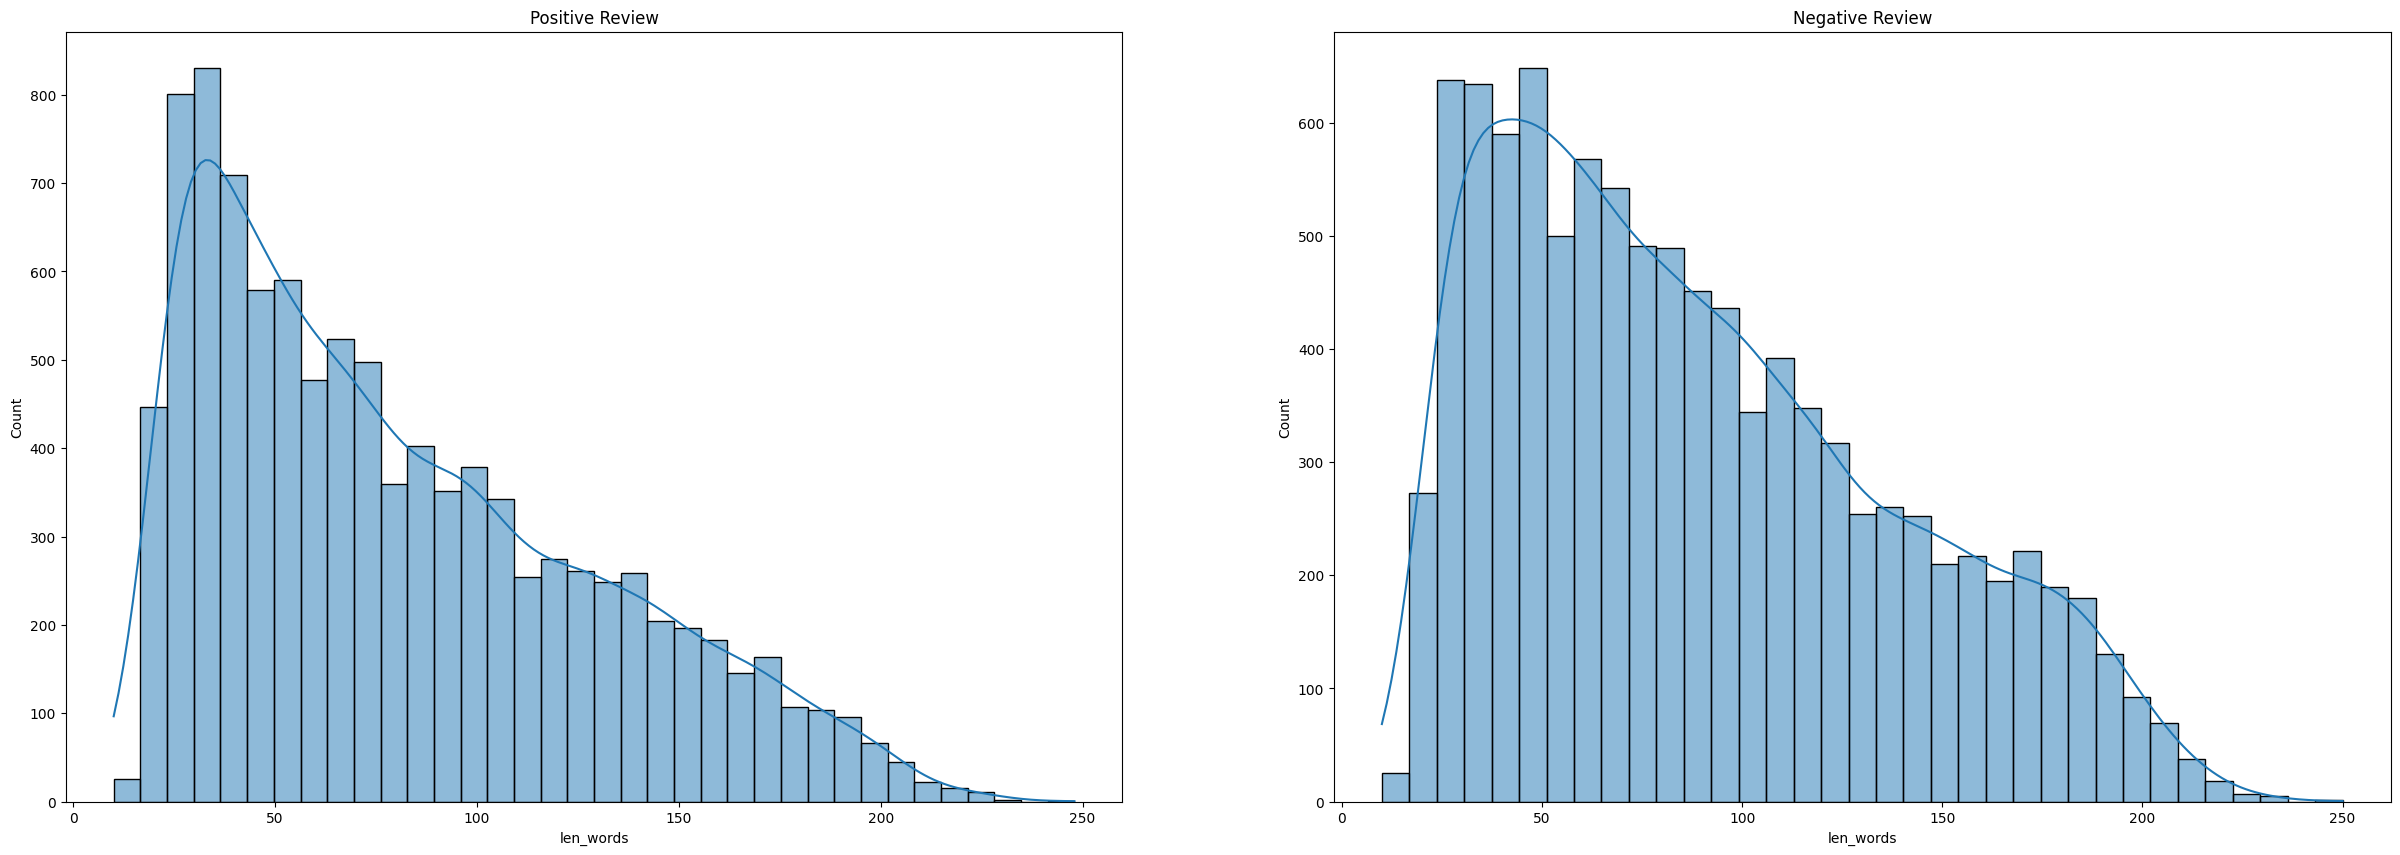

In [38]:
# Histogram plot for each review
fig, ax =plt.subplots(1,2,figsize=(30,10))
sns.histplot(ax=ax[0],data=df_eda[df_eda['class_index'] == 'Positive Review']['len_words'],kde=True)
ax[0].set_title('Positive Review')
sns.histplot(ax=ax[1],data=df_eda[df_eda['class_index'] == 'Negative Review']['len_words'],kde=True)
ax[1].set_title('Negative Review')


### 1. Positive Review

In [39]:
# Print Max and Average number of words on positive review

print('The maximum number of words on positive review is ', df_eda[df_eda['class_index']=='Positive Review']['len_words'].max())
print('The average number of words on positive review is', df_eda[df_eda['class_index']=='Positive Review']['len_words'].mean())

The maximum number of words on positive review is  248
The average number of words on positive review is 80.94115288220551


- The maximum number of words on positive reviews is  232 words.
- The average number of words on positive reviews is 81.19 words.

Next, look for example of positive reviews with the maximum number of words.

In [40]:
# Positive review with the most number of words
df_eda[df_eda['len_words']==232]
print(df_eda[df_eda['len_words']==232]['review_text'].iloc[0])

My daughter got the PS1 with LCD screen combo for Christmas a year ago, and when we opened it and hooked it up, the screen did not work properly. The screen was black, but if you held it at an angle, you could tell there were graphics present. Yes, we adjusted the contrast and nothing helped. We took it back and they had no more in stock, so we went to Sears. We got their last one and I asked to hook it up and try it out before we left--just in case. Sure enough, it did the same thing, so we left empty handed. Finally, we found a combo unit at Target and it worked--for about 7 months. A few months ago, it started going on the fritz and if we unplugged the cable and fiddled with it, it would work again. It finally quit working alltogether. It was great while it worked, but now I'm leery as to how long another one will work. Is a 90 day warranty sufficient for an item so pricey? I don't think so. I'm faced with replacing it, because to fix it would probably cost even more. What a shame.


### 2. Negative Review

In [41]:
# Print Max and Average number of words on negative review

print('The maximum number of words on negative review is ', df_eda[df_eda['class_index']=='Negative Review']['len_words'].max())
print('The average number of words on negative review is', df_eda[df_eda['class_index']=='Negative Review']['len_words'].mean())

The maximum number of words on negative review is  250
The average number of words on negative review is 89.24997506234413


- The maximum number of words on negative reviews is  239 words.
- The average number of words on positive reviews is 88.75 words.

Next, look for example of negative reviews with the maximum number of words.

In [43]:
# Negative reviews with the most number of words
df_eda[df_eda['len_words']==250]
print(df_eda[df_eda['len_words']==250]['review_text'].iloc[0])

shorties are fat and UGLY!!!do not waste your money iwish they would die on the 4th of july i am putting a fire work in one and watching it explode I HATE THEM THEY ARE CREEPY!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!AHHH!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


This review contains words in uppercase letters, which are commonly used to express strong emotions.

Based on the information above, it is known that **negative reviews have, on average, more words than positive reviews**.  Based on my assumption, there could be various reasons why negative reviews have, on average, more words than positive reviews. Here are some possible explanations:

1. **Complex issues**: Negative reviews might involve more complex issues or problems with the product or service, which require more detailed explanations and examples.

2. **Emotional expression**: Negative reviews might include more emotional expression, such as frustration or disappointment, which can lead to more detailed and expressive language.

3. **Expectations**: Negative reviews might involve higher expectations from customers, leading them to provide more detailed feedback in order to articulate their disappointment or frustration.

4. **Personal experience**: Negative reviews might be based on a more personal experience, such as a defective product or poor customer service, which can lead to a more detailed and personalized account of the issue.


## 4.4 Wordcloud

In this section, data exploration is carried out to find out the most common words in positive and negative reviews. The library used to create visualizations is `WordCloud`.

### 1. Positive Review

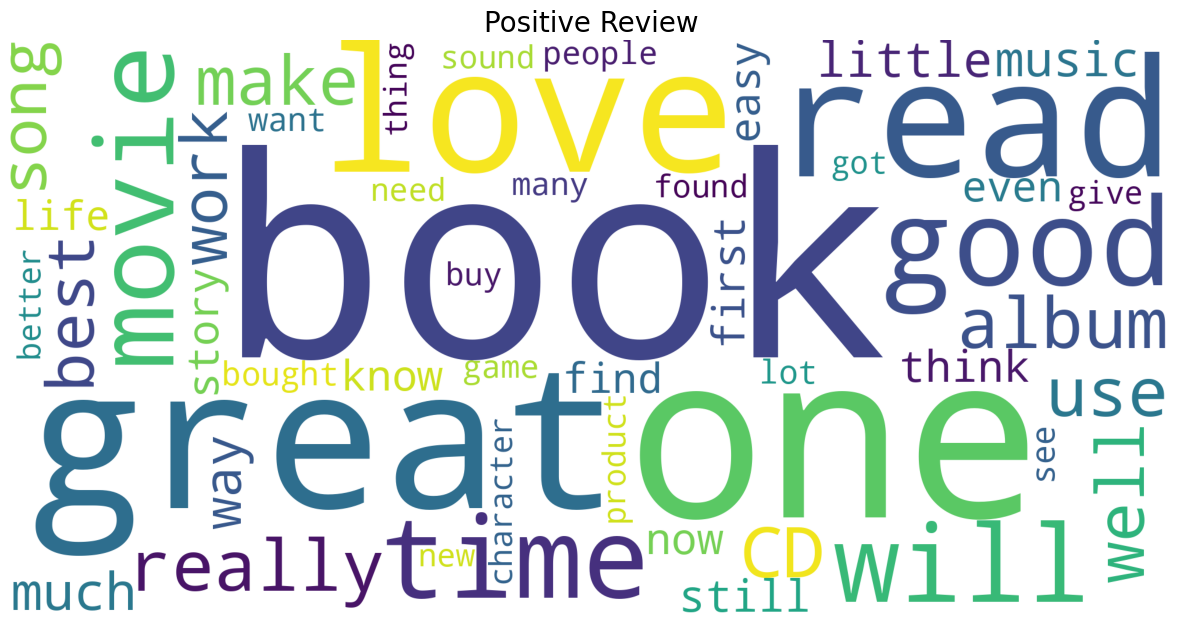

In [44]:
# Creating wordcloud
text_positive = positive_review.review_text.values
cloud_positive = WordCloud(max_words=50, background_color="white",width=2000,height=1000).generate(" ".join(text_positive))

# Showing wordcloud
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title("Positive Review",fontsize=20)
plt.imshow(cloud_positive)

### 2. Negative Review

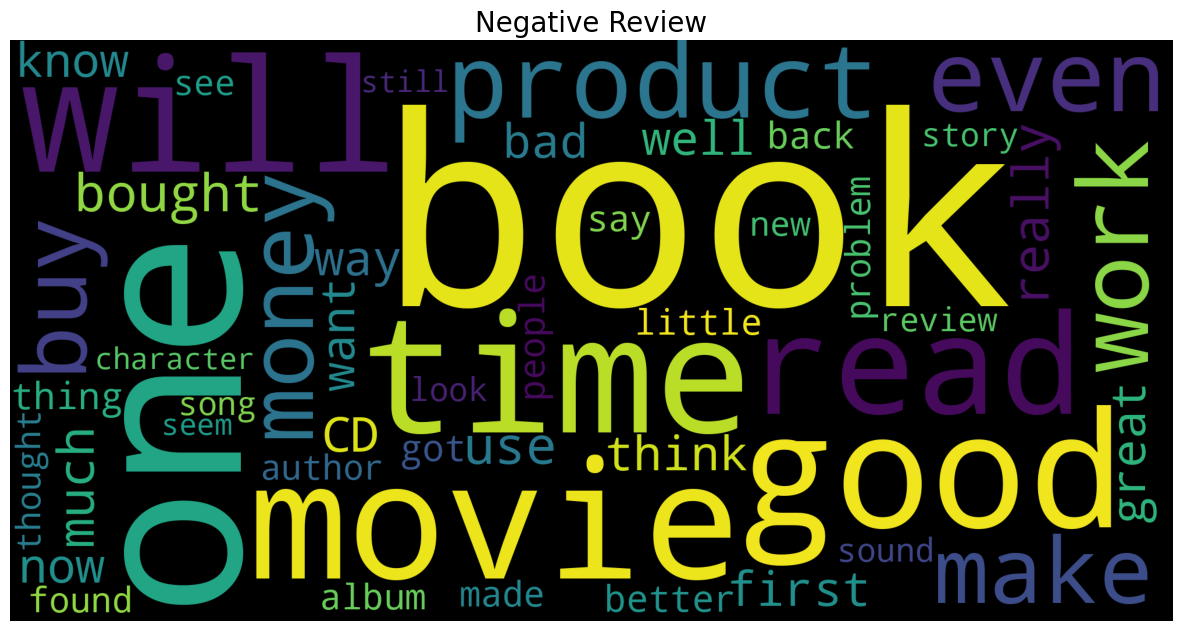

In [45]:
# Creating wordcloud
text_negative = negative_review.review_text.values
cloud_negative = WordCloud(max_words=50, background_color="black",width=2000,height=1000).generate(" ".join(text_negative))

# Showing wordcloud
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title("Negative Review",fontsize=20)
plt.imshow(cloud_negative)

From the 2 visualizations above, we can obtain the following information:
1. **Book**, **movie**, **cd** and **album** are the products most frequently reviewed by amazon customers.
2. The most frequent positive words used by amazon customers included **good**, **great**, **love**, **best**, and **easy**. 
3. The most common negative words used by amazon customers included **bad**, **used** and **problem**.

---

# 5 - Data Preprocessing

> This section explains the process of preparing data for the model training process, such as creating data inference, text pre processing, tokenization, target encoding and creating pipeline.

## 5.1 Creating Data Inference

This section explains how to create a data inference. To create the data inference, we will set aside 10 data from the original dataset. Data inference taken from different dataset which is `train.csv` dataset so it doesn't reduce the size of the original dataset. 

In [46]:
data = pd.read_csv('/content/amazon_review_sa_binary_csv/train.csv')

In [47]:
# Creating data inference
df_inf = data.sample(10, random_state=0).sort_index()
print('size of data inference (rows,columns) : ',df_inf.shape)
df_inf.reset_index(drop=True).head(10)

size of data inference (rows,columns) :  (10, 3)


,class_index,review_title,review_text
0,2,"This Or ""Dixie Chicken"" Presents Them At A Peak",Though lyrically the overall feel of this reco...
1,2,"It's not perfect, but very good!",I have been looking for an anthology of outsta...
2,2,Well done,While the characters are not the same as in th...
3,1,"Not so great, but pretty colors",I tried/own both the pink and the orangish col...
4,1,Ruined My Valentine's Day!,I read each Amazon review on this product befo...
5,2,Concise Text of Neuroscience,I bought this book for my brother as he is tak...
6,2,GREAT!!!!!,I got this toy a couple of days ago and I ABSO...
7,2,Hot Coffee,Good coffee pot. Hot coffee. 6-8 cups makes a ...
8,2,Mystery at Walt Disney World,"Book arrived in good condition, but took quite..."
9,1,Take with a dose of skepticism...,"All readers should keep in mind that, as anoth..."


In [48]:
# Saving data inference as .csv file
df_inf.to_csv('h8dsft_p2m2_Ahmad Luay Adnani_inference.csv')

## 5.2 Text Preprocessing

The text preprocessing carried out includes:

1. **Converting all text to Lowercase**

  From EDA, it was found that on each review there were words written in uppercase letters. This shows that uppercase does not affect the classification of the type of review.

2. **Removing Unicode Characters**

  From EDA, it was found that there is a review written in Unicode Characters. These characters were removed because they made the review unreadable.

3. **Making letters only**

  This will make the reviews as letters only, although. Symbols, punctuation, and number will be removed as well.

4. **Removing Whitespace**

  These erroneous whitespaces as this is a problem resulting the context of words will be changed. For example, there is a whilespace in `eff ect` while we want `effect` as the word. Then, deleting whitespace in such example should be applied.

5. **Removing emoji**

  Emojis were removed because they cannot be processed by NLP .

6. **Tokenizing words**

  We will tokenize the words. We will split the sentences with spaces e.g "I might come" to be "I", "might", "come".

7. **Removing stopwords**

  Words that are so common they are basically ignored by typical tokenizers. By default, NLTK (Natural Language Toolkit) includes a list of 40 stop words, including: “a”, “an”, “the”, “of”, “in”, etc. The stopwords in nltk are the most common words in data. Common words that appear in both reviews also added to stopwords. Besides English, Spanish, French and German are also added to the stopwords. ([source](https://aclanthology.org/2020.emnlp-main.369.pdf))

8. **Lemmatization**

  To convert word to its root form.It is a step by step procedure of obtaining the root form of the word, it makes use of vocabulary (dictionary importance of words) and morphological analysis (word structure and grammar relations. For example, `cacti` will be converted to `cactus` as the basic word.



The next step is to add Spanish, French, and German to the stopwords.

In [49]:
# Adding spanish to stopwords
spanish = stopwords.words('spanish')
additional_stopwords = []
for i in spanish:
    additional_stopwords.append(i)

# Adding french to stopwords
french = stopwords.words('french')
for i in french:
    additional_stopwords.append(i)

# Adding german to stopwords
german = stopwords.words('german')
for i in german:
    additional_stopwords.append(i)

In [50]:
# Common Words that appear in both reviews
add_words = ['book','like','one','good','would','read','get','much','many','first','really',
             'back','old','dont','great','buy','could','way','new']
for i in add_words:
    additional_stopwords.append(i)

In [51]:
# Setting stopwords with english as default language
stopwords = list(set(stopwords.words('english')))
for i in additional_stopwords:
    stopwords.append(i)

**All Documents**

In [52]:
lemmatizer = WordNetLemmatizer()
def text_processing(text):

    # Converting all text to Lowercase
    text = text.lower()

    # Removing Unicode Characters
    text = re.sub("&#[A-Za-z0-9_]+", " ", text)

    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
  
    # Removing Whitespace
    text = text.strip()

    # Removing emoji
    text = re.sub("[^A-Za-z\s']", " ", text)

    # Removing double space
    text = re.sub("\s\s+" , " ", text)
        
    # Tokenizing words
    tokens = word_tokenize(text)

    # Removing Stopwords
    text = ' '.join([word for word in tokens if word not in stopwords])

    # Lemmatizer
    text = lemmatizer.lemmatize(text)

    return text

Next step is applying all text preprocessing in one document.

In [53]:
# Applying all preprocessing in one document
df_final = df2.copy()
df_final['review_processed'] = df_final['review_text'].apply(lambda x: text_processing(x))
df_final = df_final.reset_index()
df_final = df_final.drop(['index'],axis=1)
df_final

,class_index,review_title,review_text,review_processed
0,2,Not what I expected,Great book - but beware that this is the mini ...,beware mini version plainly says didnt notice ...
1,2,Listening to this soundtrack is a journey like...,"Ok, so I'm plagiarizing the Venice Simplon Ori...",ok plagiarizing venice simplon orient express ...
2,2,Best lube ever!,This lube is great for any purpose. My wife an...,lube purpose wife love makes perfect isnt stic...
3,2,I would highly recommend this product. My face...,I would highly recommend this product. My face...,highly recommend product face oily prone acne ...
4,2,Keeps them busy!,I bought a dozen of these for the goody bags f...,bought dozen goody bags daughters fourth birth...
...,...,...,...,...
19995,1,Slasher films shouldn't be considered horror,Scream 2 is an example of how bad the slasher ...,scream example bad slasher genre lacks creativ...
19996,2,serenity,Excellent Halperin CD. You can get lost in the...,excellent halperin cd lost waves relaxing chil...
19997,1,The agenda,The screenplay in this movie was written to ad...,screenplay movie written advance commentary pa...
19998,2,One of the Funk Mob's 80's finest,"All the tracks on this album are great, but tr...",tracks album tracks two six classics musicians...


## 5.3 Split between Train-Set, Val-Set, and Test-Set

This section explains how to separate dataset into training set, testing set and validation set. Train_val-set uses 85% data while Test-set uses 15% data. Then Train_val-set will be split again with the proportion of 85% Train-set data and 15% Val-set data. stratified is not used because the data is balance.

In [54]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(df_final['review_processed'], df_final['class_index'], test_size=0.15, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=10)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (14450,)
Val Size :  (2550,)
Test Size :  (3000,)


In [55]:
# copy X_test
X_test_copy = X_test.copy()

## 5.4 Tokenization

Tokenization is an important step in many NLP applications, as it allows for further analysis of the individual tokens, such as part-of-speech tagging, named entity recognition, and sentiment analysis. It also helps with text normalization and cleaning, by removing unwanted characters and formatting from the text. For example, the sentence "lovely pat one great voices generation listened cd years still love" could be tokenized into the following tokens: "lovely", "pat", "one", "great", "voices", "generation", "listened", "cd", "years", "still", "love".

First, we fit the `tokenizer` on the training set. in this analysis the `tokenizer` used is tensorflow's `tokenizer`. 

In [56]:
# Tokenazing the Data (the Reviews)

t = Tokenizer(oov_token='<UNK>') # Unknown

# fit the tokenizer on train documents
t.fit_on_texts(X_train)

The `<UNK>` token represents an unknown word. A tokenizer converts a set of words into numbers if those words are in its vocabulary. If a word is unknown, the tokenizer will replace that word with a `<UNK>` rather than a number.

The next step is to find the number of vocabularies and the length of token in one document.

In [57]:
# Get our training data word index
word_index = t.word_index

# Finding number of vocabularies and length of token in one document
sum_vocab = len(word_index)
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Number of Vocabularies : ", sum_vocab)
print("Maximum review length in words : ", max_sen_len, "words")

Number of Vocabularies :  50398
Maximum review length in words :  106 words


In [58]:
# top 1000 token
word_index

{'<UNK>': 1,
 'time': 2,
 'movie': 3,
 'well': 4,
 'even': 5,
 'love': 6,
 'use': 7,
 'product': 8,
 'bought': 9,
 'better': 10,
 'cd': 11,
 'album': 12,
 'work': 13,
 'little': 14,
 'story': 15,
 'think': 16,
 'best': 17,
 'make': 18,
 'two': 19,
 'know': 20,
 'music': 21,
 'people': 22,
 'got': 23,
 'still': 24,
 'want': 25,
 'find': 26,
 'never': 27,
 'books': 28,
 'ive': 29,
 'money': 30,
 'recommend': 31,
 'see': 32,
 'made': 33,
 'didnt': 34,
 'years': 35,
 'found': 36,
 'go': 37,
 'cant': 38,
 'bad': 39,
 'used': 40,
 'say': 41,
 'another': 42,
 'ever': 43,
 'quality': 44,
 'put': 45,
 'reading': 46,
 'songs': 47,
 'thing': 48,
 'life': 49,
 'every': 50,
 'doesnt': 51,
 'thought': 52,
 'game': 53,
 'lot': 54,
 'easy': 55,
 'give': 56,
 'worth': 57,
 'sound': 58,
 'however': 59,
 'something': 60,
 'long': 61,
 'dvd': 62,
 'going': 63,
 'film': 64,
 'hard': 65,
 'last': 66,
 'since': 67,
 'characters': 68,
 'looking': 69,
 'need': 70,
 'right': 71,
 'year': 72,
 'day': 73,
 'anyon

Now, we tokenize the entries, converting them from English words to numbers.

In [59]:
# Transforming Reviews to Sequences

X_train = t.texts_to_sequences(X_train)
X_test = t.texts_to_sequences(X_test)
X_val = t.texts_to_sequences(X_val)

After tokenizing the data, we still have to address one more problem. The reviews are not all the same length, so we must pad them up to maximum length of token in one document.



In [60]:
# Padding the dataset to a maximum review length in words

X_train = pad_sequences(X_train, maxlen=max_sen_len)
X_test = pad_sequences(X_test, maxlen=max_sen_len)
X_val = pad_sequences(X_val, maxlen=max_sen_len)

The following is an example of the result of padding.

In [61]:
# Document Example
print('Document Example')
print(df_final.review_processed[0])
print('')

# Padding Results
print('Padding Results')
print(X_train[0])
print('Size : ', X_train[0].shape)

Document Example
beware mini version plainly says didnt notice got tiny mail

Padding Results
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0   166   245   120 11681  6928    36 20695  8633   939
   339   245   245  8633 11682   939   339    10    10 11681    42   207
  1032   776 11681    46  1544   308   310   521  8634  1243]
Size :  (106,)


## 5.5 Target Encoding

This section explains the process of encoding with `LabelEncoder`. `LabelEncoder` is used to change the label to **0 for negative reviews** and **1 for positive reviews**.

In [62]:
# Encoding Labels

le = LabelEncoder()
num_classes=2 # positive -> 1, negative -> 0

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

## 5.6 Tensorflow Pipeline

This section contains the creation of a pipeline, the pipeline that will be used is the Tensorflow pipeline. In this pipeline, following configuration is applied :
- Number of batch is 1024 because the size of the dataset is too big.
- Number of shuffle is equal to the number of column in train set.

In [63]:
# Bundle preprocessing for numerical and categorical data to tensorflow before being input to the model
train_pipe = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(1024).shuffle(len(X_train)).prefetch(tf.data.AUTOTUNE)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(1024)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(1024)

---

# 6 - Model Definition

> This section describes the algorithms and metrics used in this analysis. 

The algorithms used are LSTM and GRU. Later, each of these models will be improved and then the most optimal model will be selected. 

The metrics that will be used is `accuracy`. High accuracy indicates that the model is able to correctly classify the sentiment expressed in the reviews, which can be used to make informed decisions regarding product development, marketing strategies, and customer support.



---

# 7 - Baseline Model - LSTM

> This section contains model training and model evaluation for the LSTM algorithm. 

Hyperparameters in this model :
1. Using the Sequential API. Because for the Baseline model we try to be as simple as possible so that later we can find out what needs to be improved from the model.

2. The number of hidden layers used in this model is 2 ([source](https://www.linkedin.com/pulse/choosing-number-hidden-layers-neurons-neural-networks-sachdev/)). hidden layer 1 has 32 neurons and hidden layer 2 has 8 neurons.

3. The embedding layer input dimension is Number of Vocabularies (50739), output dimension is 128 and input length is maximum length of token (106).

4. The optimizer is SGD due to its good convergence quality.

In [64]:
# LSTM Baseline
# Clear Session

seed = 50
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# model initialization
model = Sequential()

# The Embedding Layer
model.add(Embedding(input_dim=sum_vocab, output_dim=128,embeddings_initializer="uniform", input_length=max_sen_len))

# The LSTM layer (32)
model.add(LSTM(32,return_sequences=True))

# The LSTM layer (8)
model.add(LSTM(8))

# The Classification layer
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='BinaryCrossentropy',
              optimizer='SGD', 
              metrics='accuracy')

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 106, 128)          6450944   
                                                                 
 lstm (LSTM)                 (None, 106, 32)           20608     
                                                                 
 lstm_1 (LSTM)               (None, 8)                 1312      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 6,472,873
Trainable params: 6,472,873
Non-trainable params: 0
_________________________________________________________________


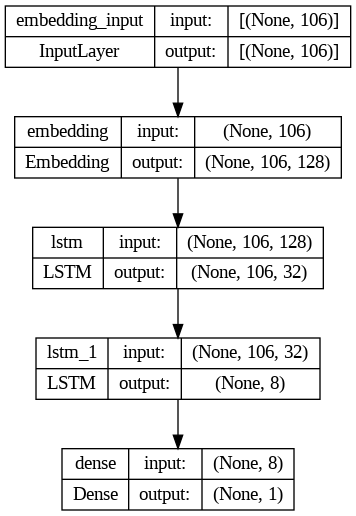

In [65]:
# Plot Layers
tf.keras.utils.plot_model(model, show_shapes=True)

## 7.1 Model Training

This section provides an overview of the process used to train our model. Due to the complexity of the model and the computational resources required, we set the number of epochs to 50 to achieve an acceptable level of accuracy without overly extending the training time.

In [66]:
%%time
history1 = model.fit(train_pipe,validation_data=(val_pipe), epochs=50)

Epoch 1/50
15/15 [==============================] - 11s 165ms/step - loss: 0.6934 - accuracy: 0.4845 - val_loss: 0.6933 - val_accuracy: 0.4882
Epoch 2/50
15/15 [==============================] - 0s 30ms/step - loss: 0.6934 - accuracy: 0.4853 - val_loss: 0.6933 - val_accuracy: 0.4902
Epoch 3/50
15/15 [==============================] - 0s 21ms/step - loss: 0.6934 - accuracy: 0.4865 - val_loss: 0.6933 - val_accuracy: 0.4875
Epoch 4/50
15/15 [==============================] - 0s 20ms/step - loss: 0.6934 - accuracy: 0.4880 - val_loss: 0.6933 - val_accuracy: 0.4902
Epoch 5/50
15/15 [==============================] - 0s 20ms/step - loss: 0.6934 - accuracy: 0.4875 - val_loss: 0.6933 - val_accuracy: 0.4925
Epoch 6/50
15/15 [==============================] - 0s 21ms/step - loss: 0.6933 - accuracy: 0.4894 - val_loss: 0.6933 - val_accuracy: 0.4929
Epoch 7/50
15/15 [==============================] - 0s 20ms/step - loss: 0.6933 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.4914
Epoch 8/50


## 7.2 Model Evaluation

In this section, an evaluation of the model's performance is carried out on the train set and test set.


### Training Set

Here is the resulting dataframe from training our model.

In [67]:
# Create DataFrame

history1_df = pd.DataFrame(history1.history)
history1_df.tail(5)

,loss,accuracy,val_loss,val_accuracy
45,0.692921,0.522422,0.692829,0.523922
46,0.692915,0.519031,0.692820,0.524706
47,0.692903,0.523391,0.692809,0.526275
48,0.692895,0.521315,0.692800,0.527843
49,0.692882,0.521522,0.692790,0.528235


For more details, see the following visualization.

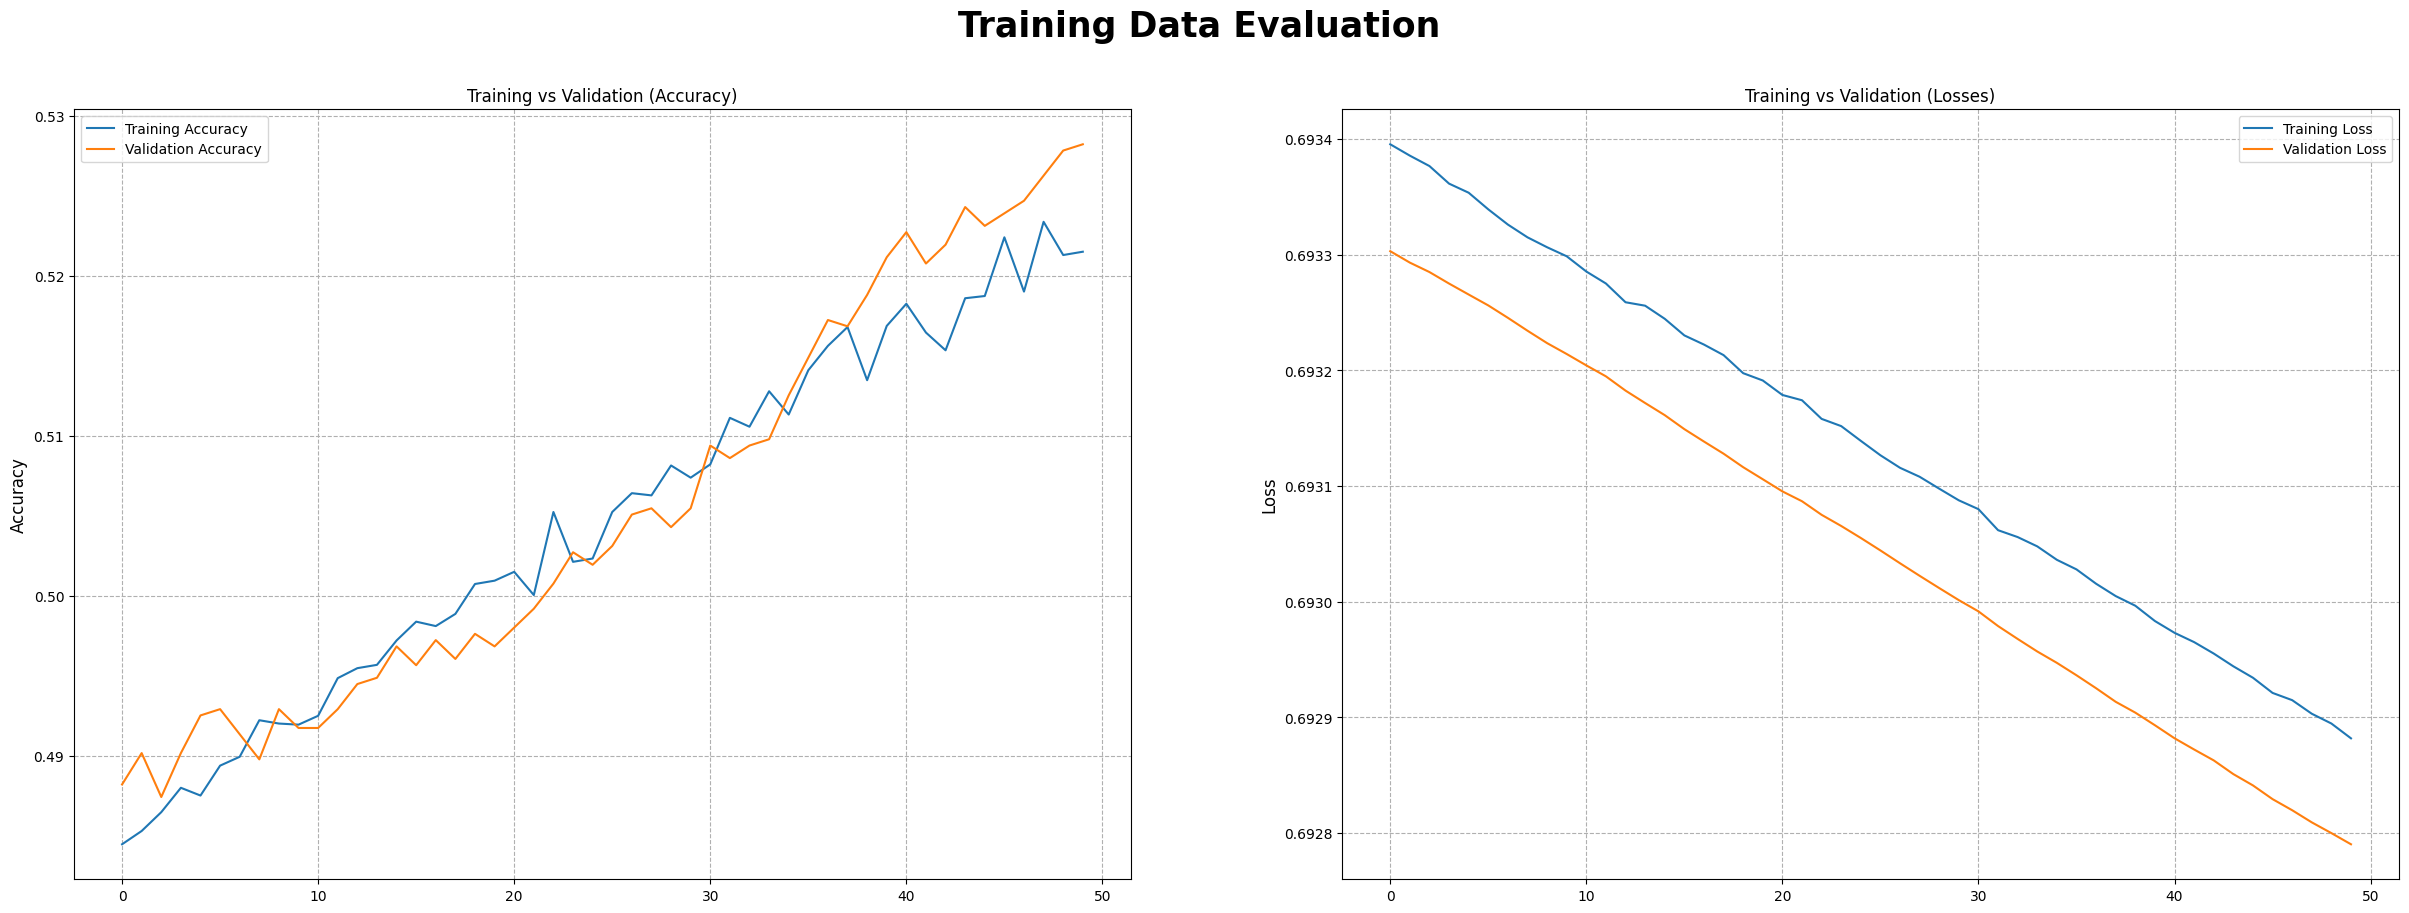

In [68]:
# Training Data Evaluation
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training vs Validation (Accuracy)", fontsize=12)
plt.plot(history1.history['accuracy'],label="Training Accuracy")
plt.plot(history1.history['val_accuracy'], label="Validation Accuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training vs Validation (Losses)", fontsize=12)
plt.plot(history1.history['loss'], label="Training Loss")
plt.plot(history1.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Based on visualization above:
- this model is **overfit**
- Despite running for a total of 50 epochs, it still did not converge.
- The accuracy of the training model's results is low.

### Test Set

94/94 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.52      0.72      0.61      1497
           1       0.55      0.33      0.42      1503

    accuracy                           0.53      3000
   macro avg       0.53      0.53      0.51      3000
weighted avg       0.53      0.53      0.51      3000



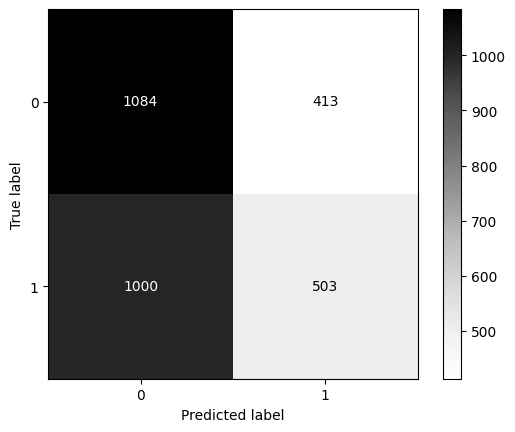

In [69]:
# Model Evaluation of test-set

y_pred_1 = model.predict(X_test)
y_pred_1 = np.where(y_pred_1 >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_1))

# confusion matrix

cm = confusion_matrix(y_test, y_pred_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()
     

It can be seen that this model has a low accuracy value for classifying the types of reviews. Next, this model will undergo model improvement, and then the results of the model improvement will be compared to the results without model improvement.

---

# 8 - Model Improvement - LSTM 

> This section contains model training and model evaluation for the improved LSTM model algorithm.

Several hyperparameters were modified to improve this model :

1. Adding bidirectional layer, it’s capable of utilizing information from both sides. It’s also a powerful tool for modeling the sequential dependencies between words and phrases in both directions of the sequence. [source](https://www.baeldung.com/cs/bidirectional-vs-unidirectional-lstm#:~:text=Bidirectional%20LSTM&text=Unlike%20standard%20LSTM%2C%20the%20input,both%20directions%20of%20the%20sequence.)
1. Adding dropout, to prevent overfitting. [source](https://keras.io/api/layers/regularization_layers/dropout/)
2. Changing optimizer to Adam, Adam is most popular optimizer. [source](https://keras.io/api/optimizers/adam/)

In [70]:
# LSTM Model Improvement
# Clear Session

seed = 50
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# model improvement initialization
model_imp = Sequential()

# The Embedding Layer
model_imp.add(Embedding(input_dim=sum_vocab, output_dim=128,embeddings_initializer="uniform", input_length=max_sen_len))

# The LSTM layer (32)
model_imp.add(tf.keras.layers.Bidirectional(LSTM(32,return_sequences=True)))

# The LSTM layer (8)
model_imp.add(LSTM(8))

# Dropout Layer
model_imp.add(Dropout(0.2))

# The Classification layer
model_imp.add(Dense(1, activation='sigmoid'))

# compile model_imp
model_imp.compile(loss='BinaryCrossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), 
              metrics=['accuracy'])

# model_imp summary
model_imp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 106, 128)          6450944   
                                                                 
 bidirectional (Bidirectiona  (None, 106, 64)          41216     
 l)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 8)                 2336      
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 6,494,505
Trainable params: 6,494,505
Non-trainable params: 0
______________________________________________

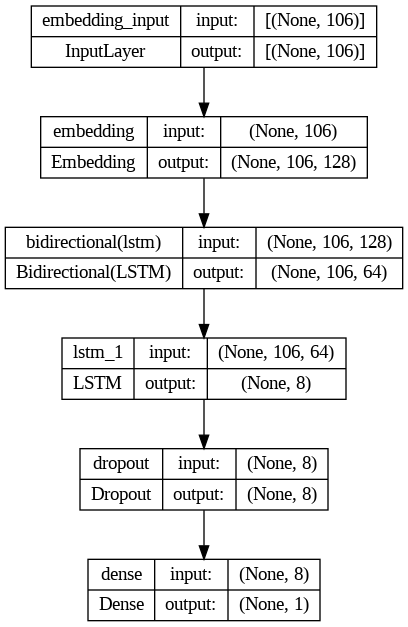

In [71]:
# Plot Layers
tf.keras.utils.plot_model(model_imp, show_shapes=True)

## 8.1 Model Training

This section provides an overview of the process used to train our model. Due to the complexity of the model and the computational resources required, we set the number of epochs to 50 to achieve an acceptable level of accuracy without overly extending the training time.



In [72]:
%%time
history2 = model_imp.fit(train_pipe,validation_data=(val_pipe), epochs=50)

Epoch 1/50
15/15 [==============================] - 11s 348ms/step - loss: 0.6925 - accuracy: 0.5293 - val_loss: 0.6915 - val_accuracy: 0.5596
Epoch 2/50
15/15 [==============================] - 1s 39ms/step - loss: 0.6903 - accuracy: 0.6089 - val_loss: 0.6898 - val_accuracy: 0.6039
Epoch 3/50
15/15 [==============================] - 1s 34ms/step - loss: 0.6878 - accuracy: 0.6567 - val_loss: 0.6873 - val_accuracy: 0.6345
Epoch 4/50
15/15 [==============================] - 1s 34ms/step - loss: 0.6838 - accuracy: 0.6873 - val_loss: 0.6836 - val_accuracy: 0.6490
Epoch 5/50
15/15 [==============================] - 1s 33ms/step - loss: 0.6783 - accuracy: 0.7096 - val_loss: 0.6783 - val_accuracy: 0.6608
Epoch 6/50
15/15 [==============================] - 1s 33ms/step - loss: 0.6704 - accuracy: 0.7191 - val_loss: 0.6709 - val_accuracy: 0.6694
Epoch 7/50
15/15 [==============================] - 1s 33ms/step - loss: 0.6596 - accuracy: 0.7257 - val_loss: 0.6610 - val_accuracy: 0.6773
Epoch 8/50


## 8.2 Model Evaluation

In this section, an evaluation of the model's performance is carried out on the train set and test set.

### Training Set

Here is the resulting dataframe from training our model

In [73]:
# Create DataFrame

history2_df = pd.DataFrame(history2.history)
history2_df.tail(5)

,loss,accuracy,val_loss,val_accuracy
45,0.105719,0.994464,0.633193,0.757647
46,0.102414,0.994948,0.644986,0.754510
47,0.100761,0.994740,0.648708,0.755294
48,0.098200,0.995294,0.662183,0.752549
49,0.096231,0.995156,0.665531,0.752549


For more details, see the following visualization.

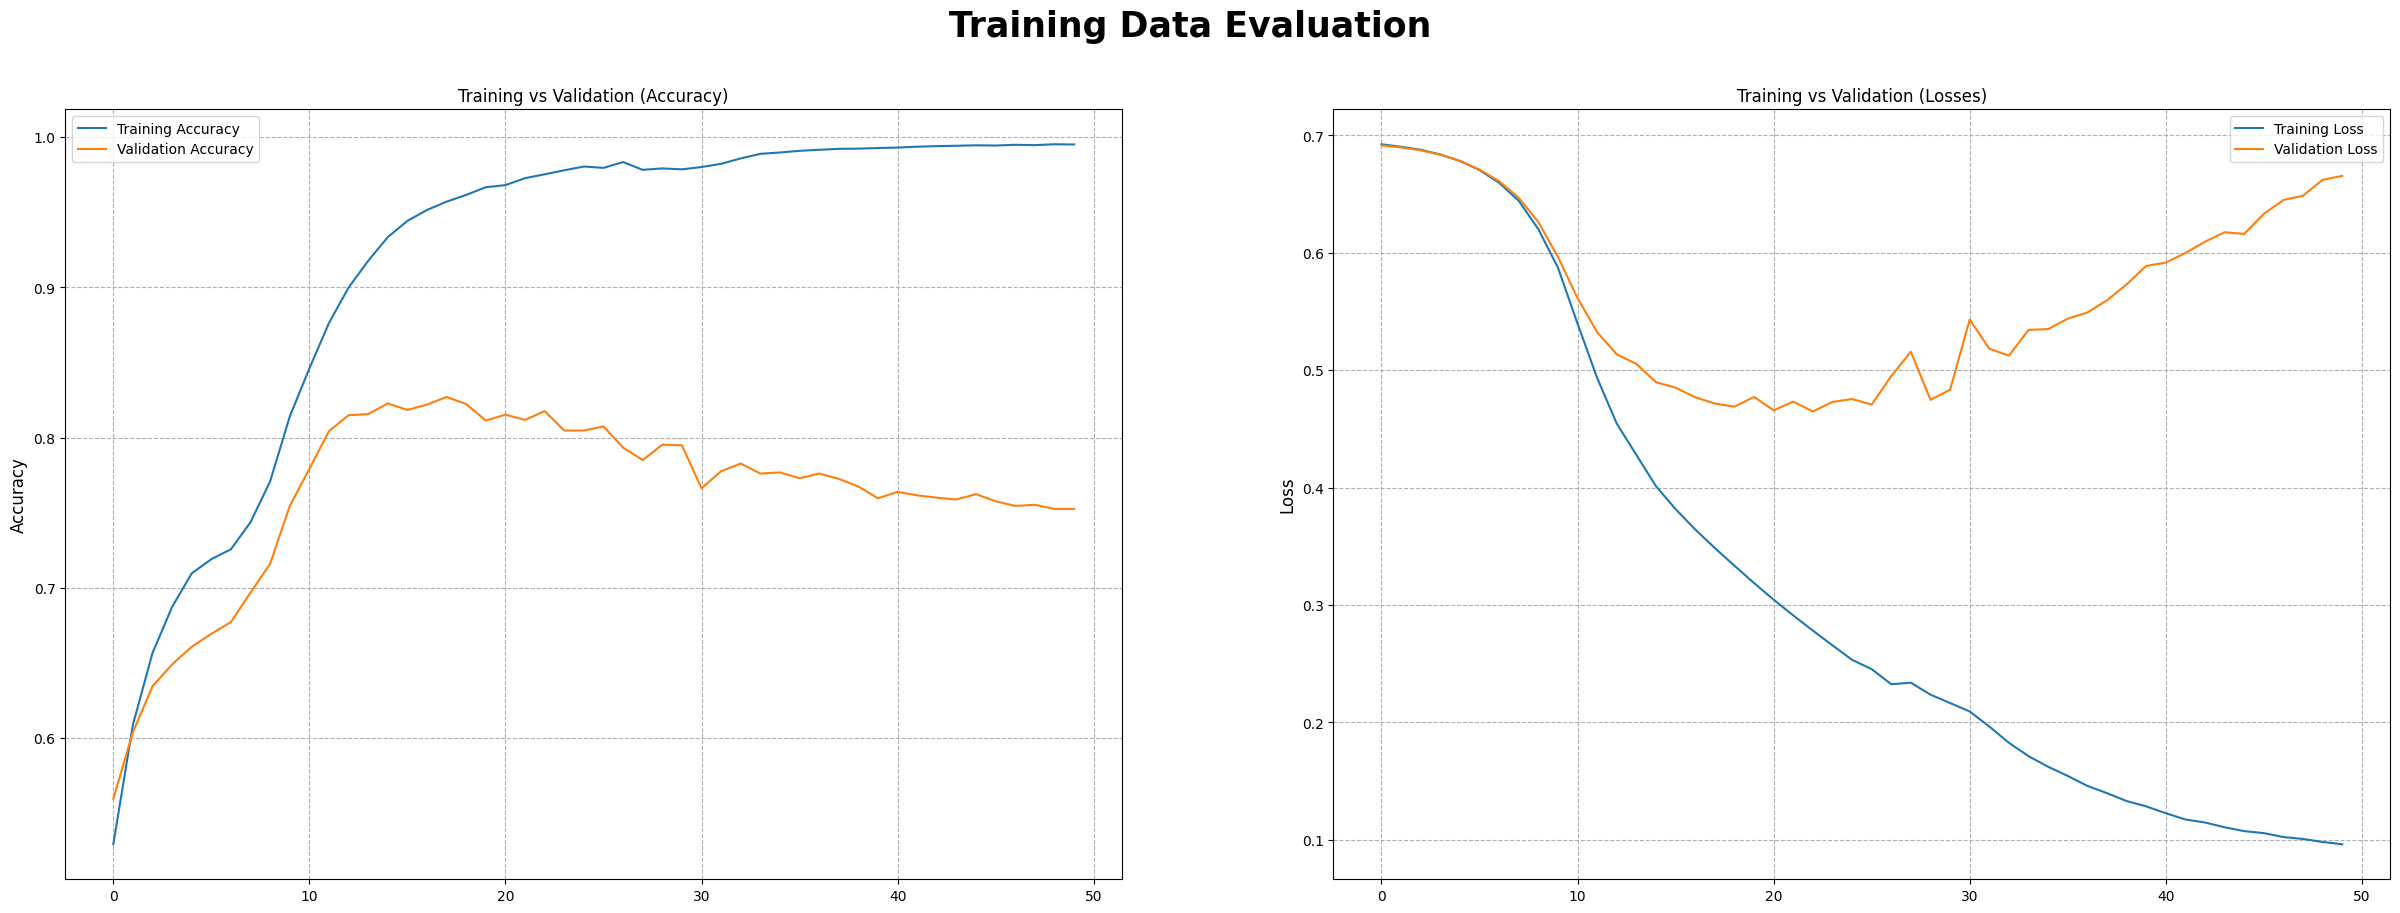

In [74]:
# Training Data Evaluation
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training vs Validation (Accuracy)", fontsize=12)
plt.plot(history2.history['accuracy'],label="Training Accuracy")
plt.plot(history2.history['val_accuracy'], label="Validation Accuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training vs Validation (Losses)", fontsize=12)
plt.plot(history2.history['loss'], label="Training Loss")
plt.plot(history2.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Based on visualization above:
- this model is still **overfit** but better than baseline model.
- It can be seen that the model is now convergent.
- The accuracy of this model is higher than baseline model.

### Test Set

94/94 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1497
           1       0.76      0.72      0.74      1503

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000



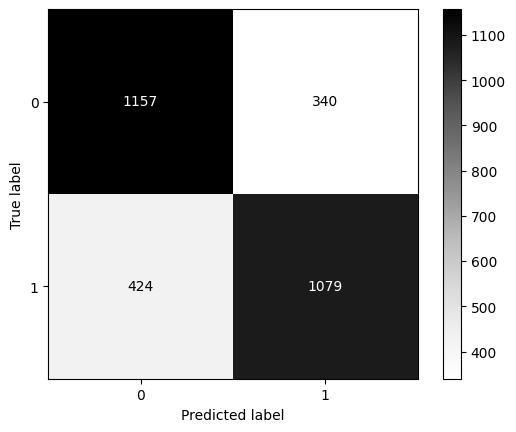

In [75]:
# Model Evaluation of test-set

y_pred_2 = model_imp.predict(X_test)
y_pred_2 = np.where(y_pred_2 >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_2))

# confusion matrix

cm = confusion_matrix(y_test, y_pred_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()
     

It can be seen that this model is more `accurate` in **classifying review types**. the difference in accuracy is quite significant from the baseline model, which is as much as **22%**.



---

# 9 - Baseline Model - GRU

> This section contains model training and model evaluation for the GRU algorithm. 

The hyperparameter used is the same as the baseline model - LSTM :
1. Using the Sequential API. Because for the Baseline model we try to be as simple as possible so that later we can find out what needs to be improved from the model.

2. The number of hidden layers used in this model is 2 ([source](https://www.linkedin.com/pulse/choosing-number-hidden-layers-neurons-neural-networks-sachdev/)). hidden layer 1 has 32 neurons and hidden layer 2 has 8 neurons.

3. The embedding layer input dimension is Number of Vocabularies (50739), output dimension is 128 and input length is maximum length of token (106).

4. The optimizer is SGD due to its good convergence quality.

In [76]:
# GRU Baseline
# Clear Session

seed = 50
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# model initialization
model_gru = Sequential()

# The Embedding Layer
model_gru.add(Embedding(input_dim=sum_vocab, output_dim=128,embeddings_initializer="uniform", input_length=max_sen_len))

# The GRU layer (32)
model_gru.add(GRU(32,return_sequences=True))

# The GRU layer (8)
model_gru.add(GRU(8))

# The Classification layer
model_gru.add(Dense(1, activation='sigmoid'))

# compile model_gru
model_gru.compile(loss='BinaryCrossentropy',
              optimizer='SGD', 
              metrics='accuracy')

# model_gru summary
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 106, 128)          6450944   
                                                                 
 gru (GRU)                   (None, 106, 32)           15552     
                                                                 
 gru_1 (GRU)                 (None, 8)                 1008      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 6,467,513
Trainable params: 6,467,513
Non-trainable params: 0
_________________________________________________________________


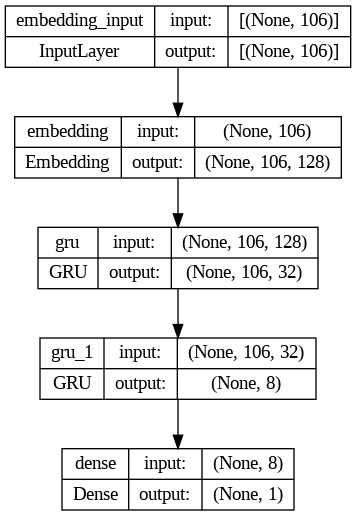

In [77]:
# Plot Layers
tf.keras.utils.plot_model(model_gru, show_shapes=True)

## 9.1 Model Training

This section provides an overview of the process used to train our model. Due to the complexity of the model and the computational resources required, we set the number of epochs to 50 to achieve an acceptable level of accuracy without overly extending the training time.


In [78]:
%%time
history3 = model_gru.fit(train_pipe,validation_data=(val_pipe), epochs=50)

Epoch 1/50
15/15 [==============================] - 6s 151ms/step - loss: 0.6931 - accuracy: 0.5021 - val_loss: 0.6934 - val_accuracy: 0.4969
Epoch 2/50
15/15 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.5033 - val_loss: 0.6934 - val_accuracy: 0.4949
Epoch 3/50
15/15 [==============================] - 0s 19ms/step - loss: 0.6930 - accuracy: 0.5064 - val_loss: 0.6934 - val_accuracy: 0.4965
Epoch 4/50
15/15 [==============================] - 0s 20ms/step - loss: 0.6930 - accuracy: 0.5055 - val_loss: 0.6934 - val_accuracy: 0.5016
Epoch 5/50
15/15 [==============================] - 0s 20ms/step - loss: 0.6930 - accuracy: 0.5075 - val_loss: 0.6934 - val_accuracy: 0.5012
Epoch 6/50
15/15 [==============================] - 0s 20ms/step - loss: 0.6929 - accuracy: 0.5074 - val_loss: 0.6933 - val_accuracy: 0.5016
Epoch 7/50
15/15 [==============================] - 0s 20ms/step - loss: 0.6929 - accuracy: 0.5093 - val_loss: 0.6933 - val_accuracy: 0.5039
Epoch 8/50
1

## 9.2 Model Evaluation

In this section, an evaluation of the model's performance is carried out on the train set and test set.

### Training Set

Here is the resulting dataframe from training our model

In [79]:
# Create DataFrame

history3_df = pd.DataFrame(history3.history)
history3_df.tail(5)

,loss,accuracy,val_loss,val_accuracy
45,0.691865,0.536194,0.692262,0.525490
46,0.691823,0.537716,0.692231,0.529020
47,0.691807,0.538477,0.692208,0.527059
48,0.691779,0.539516,0.692181,0.528235
49,0.691740,0.541246,0.692143,0.530980


For more details, see the following visualization.

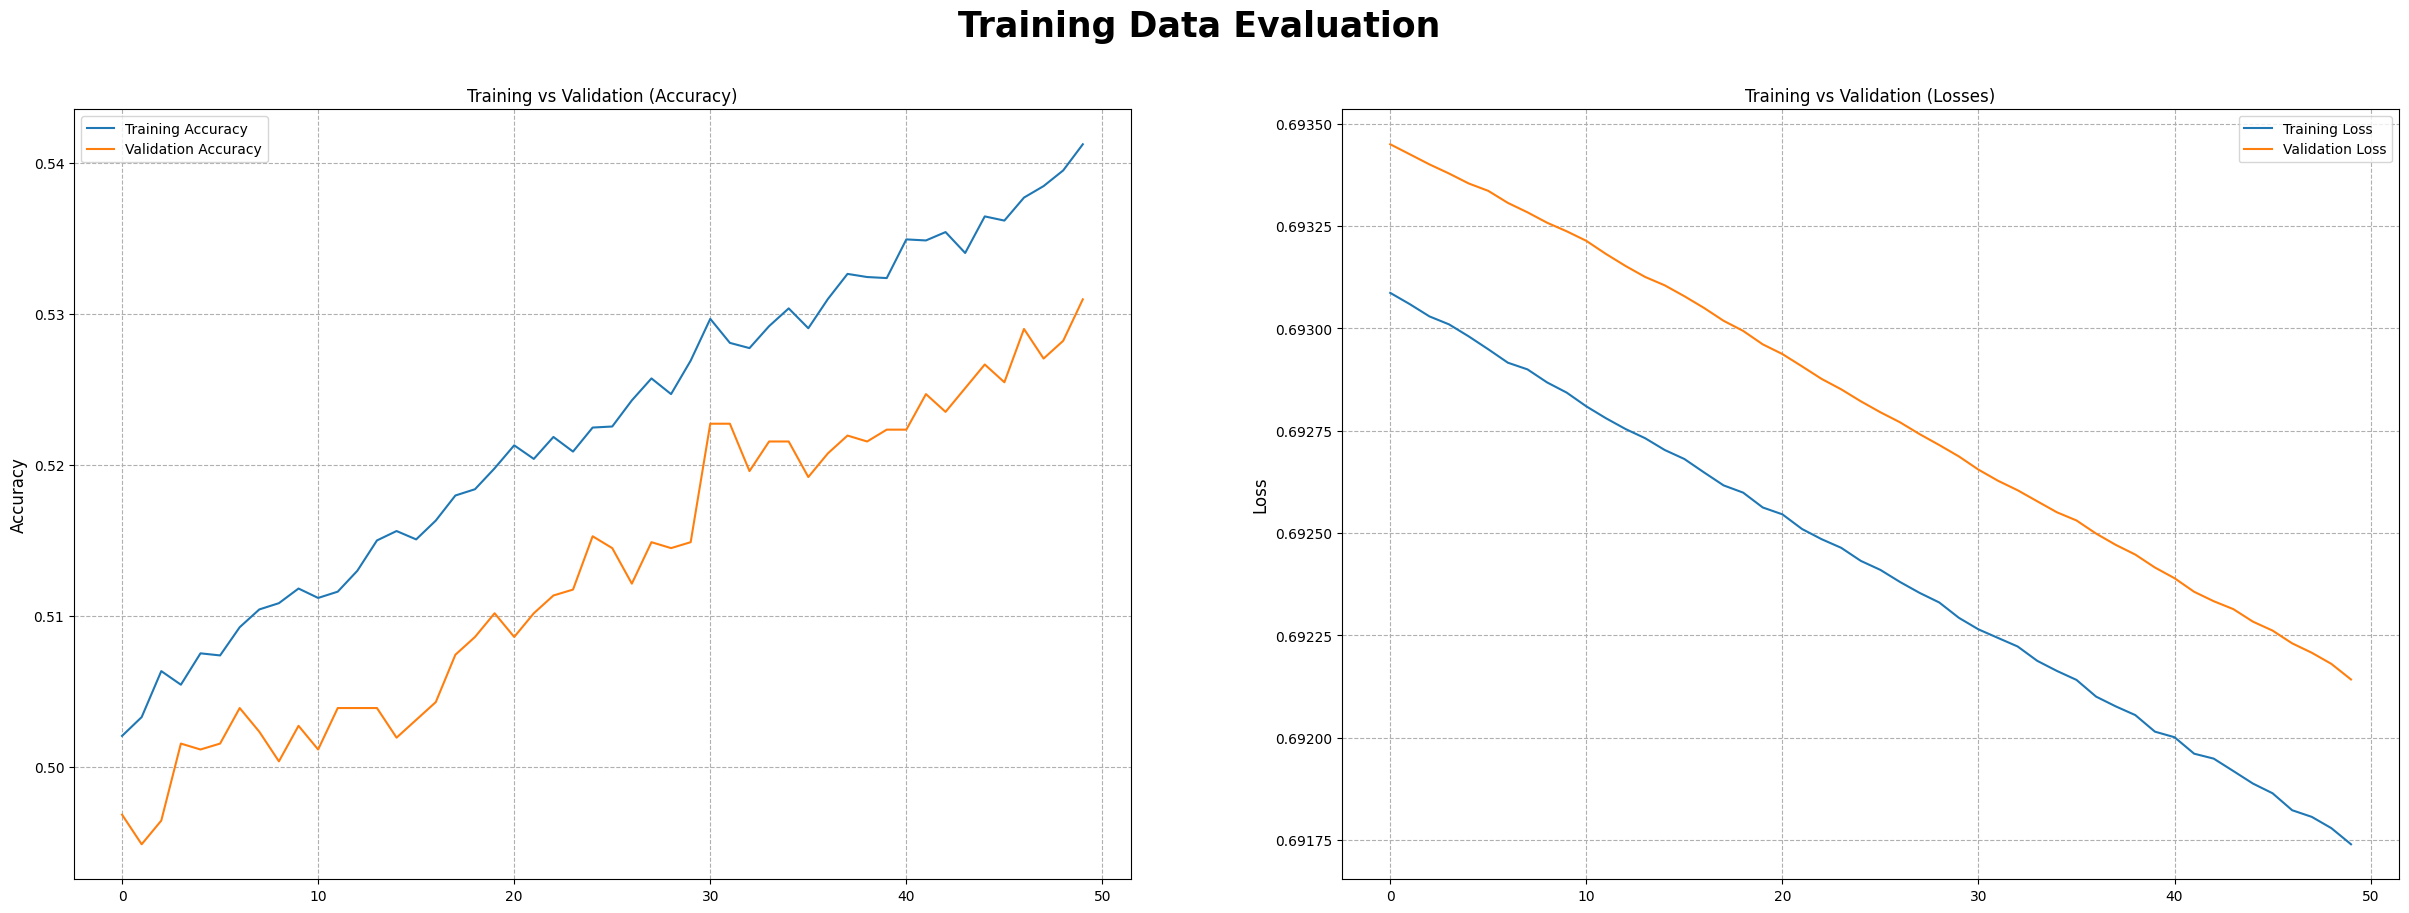

In [80]:
# Training Data Evaluation
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training vs Validation (Accuracy)", fontsize=12)
plt.plot(history3.history['accuracy'],label="Training Accuracy")
plt.plot(history3.history['val_accuracy'], label="Validation Accuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training vs Validation (Losses)", fontsize=12)
plt.plot(history3.history['loss'], label="Training Loss")
plt.plot(history3.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Based on visualization above:
- this model is **overfit**
- Despite running for a total of 50 epochs, it still did not converge.
- The accuracy of the training model's results is low.

### Test Set

94/94 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.53      0.49      0.51      1497
           1       0.53      0.58      0.55      1503

    accuracy                           0.53      3000
   macro avg       0.53      0.53      0.53      3000
weighted avg       0.53      0.53      0.53      3000



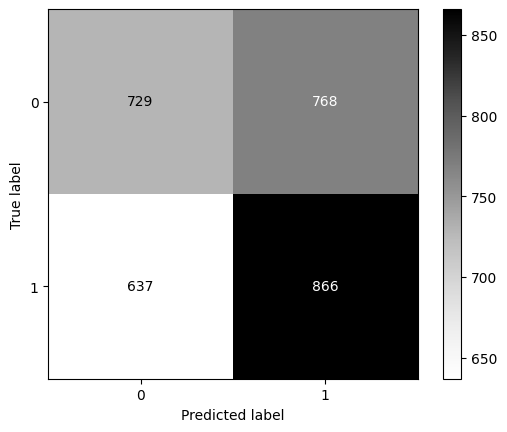

In [81]:
# Model Evaluation of test-set

y_pred_3 = model_gru.predict(X_test)
y_pred_3 = np.where(y_pred_3 >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_3))

# confusion matrix

cm = confusion_matrix(y_test, y_pred_3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()
     

It can be seen that this model has a low accuracy value for classifying the types of reviews. Next, this model will undergo model improvement, and then the results of the model improvement will be compared to the results without model improvement.

---

# 10 - Model Improvement - GRU

> This section contains model training and model evaluation for the improved GRU model algorithm.

Several hyperparameters were modified to improve this model :

1. Adding bidirectional layer, it’s capable of utilizing information from both sides. It’s also a powerful tool for modeling the sequential dependencies between words and phrases in both directions of the sequence. [source](https://paperswithcode.com/method/bigru#:~:text=A%20Bidirectional%20GRU%2C%20or%20BiGRU,the%20input%20and%20forget%20gates.)
2. Adding dropout, to prevent overfitting. [source](https://keras.io/api/layers/regularization_layers/dropout/)
3. Changing optimizer to Adam, Adam is most popular optimizer. [source](https://keras.io/api/optimizers/adam/)

In [82]:
# GRU Model Improvement
# Clear Session

seed = 50
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# model improvement initialization
model_gruimp = Sequential()

# The Embedding Layer
model_gruimp.add(Embedding(input_dim=sum_vocab, output_dim=128,embeddings_initializer="uniform", input_length=max_sen_len))

# The GRU layer (32)
model_gruimp.add(tf.keras.layers.Bidirectional(GRU(32,return_sequences=True)))

# The GRU layer (8)
model_gruimp.add(GRU(8))

# Dropout Layer
model_gruimp.add(Dropout(0.2))

# The Classification layer
model_gruimp.add(Dense(1, activation='sigmoid'))

# compile model_gruimp
model_gruimp.compile(loss='BinaryCrossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), 
              metrics=['accuracy'])

# model_gruimp summary
model_gruimp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 106, 128)          6450944   
                                                                 
 bidirectional (Bidirectiona  (None, 106, 64)          31104     
 l)                                                              
                                                                 
 gru_1 (GRU)                 (None, 8)                 1776      
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 6,483,833
Trainable params: 6,483,833
Non-trainable params: 0
______________________________________________

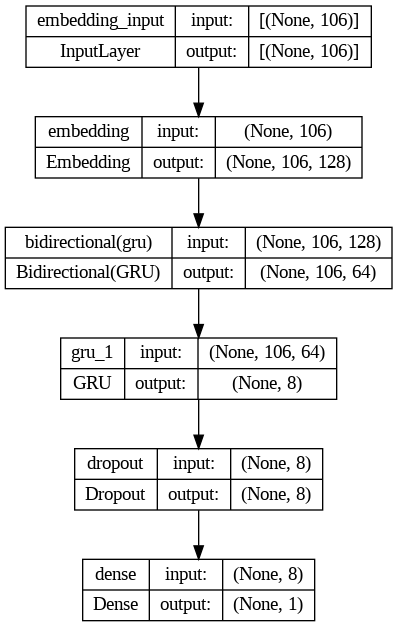

In [83]:
# Plot Layers
tf.keras.utils.plot_model(model_gruimp, show_shapes=True)

## 10.1 Model Training

This section provides an overview of the process used to train our model. Due to the complexity of the model and the computational resources required, we set the number of epochs to 50 to achieve an acceptable level of accuracy without overly extending the training time.

In [84]:
%%time
history4 = model_gruimp.fit(train_pipe,validation_data=(val_pipe), epochs=50)

Epoch 1/50
15/15 [==============================] - 10s 232ms/step - loss: 0.6930 - accuracy: 0.5110 - val_loss: 0.6924 - val_accuracy: 0.5275
Epoch 2/50
15/15 [==============================] - 1s 39ms/step - loss: 0.6910 - accuracy: 0.5774 - val_loss: 0.6910 - val_accuracy: 0.5831
Epoch 3/50
15/15 [==============================] - 1s 33ms/step - loss: 0.6888 - accuracy: 0.6363 - val_loss: 0.6893 - val_accuracy: 0.6290
Epoch 4/50
15/15 [==============================] - 1s 34ms/step - loss: 0.6861 - accuracy: 0.6837 - val_loss: 0.6870 - val_accuracy: 0.6533
Epoch 5/50
15/15 [==============================] - 1s 34ms/step - loss: 0.6823 - accuracy: 0.7224 - val_loss: 0.6840 - val_accuracy: 0.6780
Epoch 6/50
15/15 [==============================] - 1s 34ms/step - loss: 0.6773 - accuracy: 0.7593 - val_loss: 0.6799 - val_accuracy: 0.7024
Epoch 7/50
15/15 [==============================] - 1s 34ms/step - loss: 0.6701 - accuracy: 0.7827 - val_loss: 0.6742 - val_accuracy: 0.7145
Epoch 8/50


## 10.2 Model Evaluation

In this section, an evaluation of the model's performance is carried out on the train set and test set.

### Training Set

Here is the resulting dataframe from training our model.

In [85]:
# Create DataFrame

history4_df = pd.DataFrame(history4.history)
history4_df.tail(5)

,loss,accuracy,val_loss,val_accuracy
45,0.066412,0.996678,0.517307,0.806667
46,0.065062,0.997370,0.526868,0.805490
47,0.063714,0.997716,0.525239,0.804706
48,0.061178,0.997785,0.526660,0.805882
49,0.060210,0.997924,0.534254,0.806275


For more details, see the following visualization.

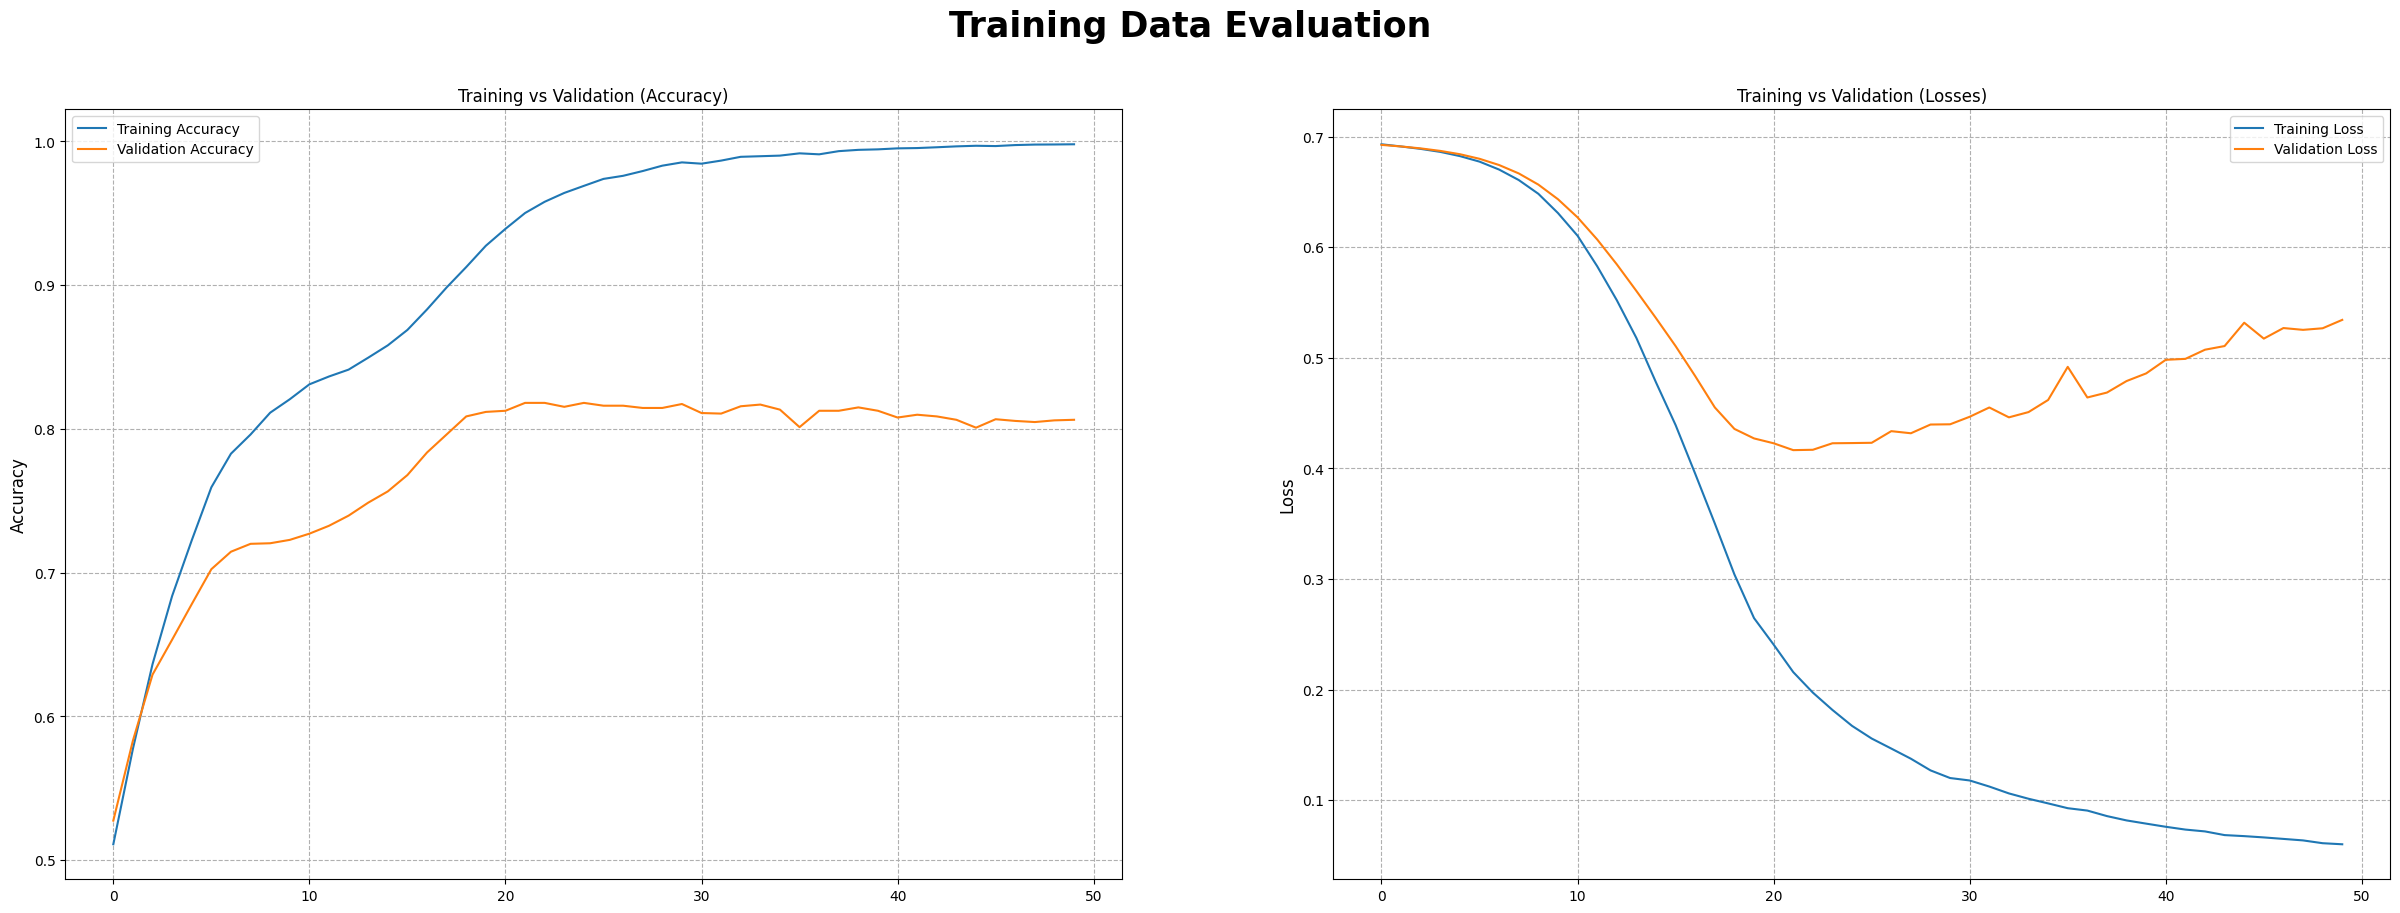

In [86]:
# Training Data Evaluation
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training vs Validation (Accuracy)", fontsize=12)
plt.plot(history4.history['accuracy'],label="Training Accuracy")
plt.plot(history4.history['val_accuracy'], label="Validation Accuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training vs Validation (Losses)", fontsize=12)
plt.plot(history4.history['loss'], label="Training Loss")
plt.plot(history4.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Based on visualization above:
- this model is still **overfit** but better than baseline model - GRU.
- The `val_loss` is lower compared to Improved model LSTM.
- It can be seen that the model is now convergent compared to baseline model - GRU.
- The `accuracy` of this model is the highest compared to other models.

### Test Set

94/94 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1497
           1       0.79      0.80      0.80      1503

    accuracy                           0.80      3000
   macro avg       0.80      0.80      0.80      3000
weighted avg       0.80      0.80      0.80      3000



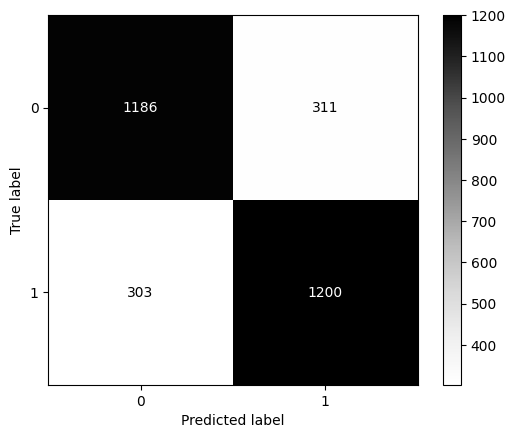

In [87]:
# Model Evaluation of test-set

y_pred_4 = model_gruimp.predict(X_test)
y_pred_4 = np.where(y_pred_4 >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_4))

# confusion matrix

cm = confusion_matrix(y_test, y_pred_4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()

It can be seen that the `accuracy` in **classifying review types** of this model is the highest compared to other models. the difference in accuracy is quite significant from the baseline model - GRU, which is as much as **28%**. 

More details about the performance comparison between models can be seen in the next section.


---

# 11 - Model Selection and its Characteristics

> This section involves comparing the performance of different models and selecting the best one.

## 11.1 Model Selection

In [88]:
# Train Evaluation

eval_training_df = pd.concat([pd.DataFrame(history1_df.iloc[-1]).rename(columns={49 :'LSTM Baseline'}),pd.DataFrame(history3_df.iloc[-1]).rename(columns={49 :'GRU Baseline'}),pd.DataFrame(history2_df.iloc[-1]).rename(columns={49 :'LSTM Improvement'}),pd.DataFrame(history4_df.iloc[-1]).rename(columns={49 :'GRU Improvement'})],axis=1).T
eval_training_df.round(2).sort_values(by='accuracy', ascending=False)

,loss,accuracy,val_loss,val_accuracy
LSTM Improvement,0.10,1.00,0.67,0.75
GRU Improvement,0.06,1.00,0.53,0.81
GRU Baseline,0.69,0.54,0.69,0.53
LSTM Baseline,0.69,0.52,0.69,0.53


In [89]:
# Test Evaluation
eval_accu = [accuracy_score(y_test, y_pred_1),accuracy_score(y_test, y_pred_2), accuracy_score(y_test, y_pred_3), accuracy_score(y_test, y_pred_4)]

# creating dataframe
eval_test_df = pd.DataFrame([eval_accu], index=['Accuracy'], columns=['LSTM Baseline', 'LSTM Improvement', 'GRU Baseline', 'GRU Improvement']).T
eval_test_df.round(3).sort_values(by= 'Accuracy', ascending=False)

,Accuracy
GRU Improvement,0.795
LSTM Improvement,0.745
GRU Baseline,0.532
LSTM Baseline,0.529


Because the objective of the analysis is to create a model with the **highest accuracy**, we have chosen the **improved GRU model** as our primary model. The `accuracy` in **classifying review types** of this model is the highest compared to other models.

## 11.2 Characteristics of a misclassified review

This section contains the characteristics of the review that were misclassified by the model.

In [90]:
# create a dataframe
y_test_df = pd.DataFrame(y_test, columns=['y_test'],index=X_test_copy.index)
y_pred_4_df = pd.DataFrame(y_pred_4, columns=['y_pred'],index=X_test_copy.index)

In [91]:
act_pred_gruimp = pd.concat([y_test_df, y_pred_4_df],axis=1)
X_test_df =pd.DataFrame(X_test_copy) 

In [92]:
# concat dataframe
best_model_df = pd.concat([X_test_df, act_pred_gruimp],axis=1)
best_model_df = best_model_df.rename(columns={'y_test': 'Actual', 'y_pred': 'Prediction'})
best_model_df

,review_processed,Actual,Prediction
19778,marilyn manson definitely worlds interesting p...,1,1
4376,theres two songs tight still fly oh yeah burne...,0,0
10188,story excellent disappointed discover true sto...,1,1
9887,bad reviews product believe gave trynow pay pr...,0,0
4441,ruarke rightfully called master outdoor writin...,1,0
...,...,...,...
17391,picked recommendation friend may sit discuss c...,1,1
5349,found predictable okay however parts unbelieve...,0,0
4815,loved close top favorite vampire books dracula...,1,1
7300,claim british account genocide present ludicro...,1,0


In [93]:
# separating words into list
best_model_df['review_list'] = best_model_df['review_processed'].apply(lambda x:str(x).split())

### Negative Review predicted as Positive Review

In [94]:
# negative review
negative_review_c = best_model_df[(best_model_df['Actual']==0)&(best_model_df['Prediction']!=0)]
negative_review_c

,review_processed,Actual,Prediction,review_list
6321,bought ended giving venezuelanborn girlfriend ...,0,1,"[bought, ended, giving, venezuelanborn, girlfr..."
13334,want help help understand sail laser isnt itas...,0,1,"[want, help, help, understand, sail, laser, is..."
7756,bought dishwasher sonhe year last week literal...,0,1,"[bought, dishwasher, sonhe, year, last, week, ..."
7523,placed worms directed even cut thirds another ...,0,1,"[placed, worms, directed, even, cut, thirds, a..."
18542,received today even though right parts number ...,0,1,"[received, today, even, though, right, parts, ..."
...,...,...,...,...
7604,find helpful least bit help save marriage auth...,0,1,"[find, helpful, least, bit, help, save, marria..."
15578,nice binding pages within facsimiles copies pu...,0,1,"[nice, binding, pages, within, facsimiles, cop..."
13020,reminded soldiers detested inattitude problems...,0,1,"[reminded, soldiers, detested, inattitude, pro..."
6338,high school teacher university instructor educ...,0,1,"[high, school, teacher, university, instructor..."


In [95]:
# Top Words Negative Review
top_nr = Counter([item for sublist in negative_review_c['review_list'] for item in sublist])
top_nr_list2 = pd.DataFrame(top_nr.most_common(50))
top_nr_list2.columns = ['Words','Count']

### Positive Review predicted as Negative Review





In [96]:
# positive review
positive_review_c = best_model_df[(best_model_df['Actual']==1)&(best_model_df['Prediction']!=1)]
positive_review_c

,review_processed,Actual,Prediction,review_list
4441,ruarke rightfully called master outdoor writin...,1,0,"[ruarke, rightfully, called, master, outdoor, ..."
8569,actually gave stars listened debut timei doubt...,1,0,"[actually, gave, stars, listened, debut, timei..."
14180,regular size tights must made skinny short peo...,1,0,"[regular, size, tights, must, made, skinny, sh..."
2123,awesome product ants busy tunnels look cool ge...,1,0,"[awesome, product, ants, busy, tunnels, look, ..."
4382,amazing product annoying thing disassemble ori...,1,0,"[amazing, product, annoying, thing, disassembl..."
...,...,...,...,...
5155,well dislike katie holmes squeaky voice got fi...,1,0,"[well, dislike, katie, holmes, squeaky, voice,..."
7899,needed inexpensive watch wear working outside ...,1,0,"[needed, inexpensive, watch, wear, working, ou..."
8699,expected nothing given dvds cheap cover turned...,1,0,"[expected, nothing, given, dvds, cheap, cover,..."
15466,friend gave thought writing throughout author ...,1,0,"[friend, gave, thought, writing, throughout, a..."


In [97]:
# Top Words positive Review
top_pr = Counter([item for sublist in positive_review_c['review_list'] for item in sublist])
top_pr_list2 = pd.DataFrame(top_pr.most_common(50))
top_pr_list2.columns = ['Words','Count']

<function matplotlib.pyplot.show(close=None, block=None)>

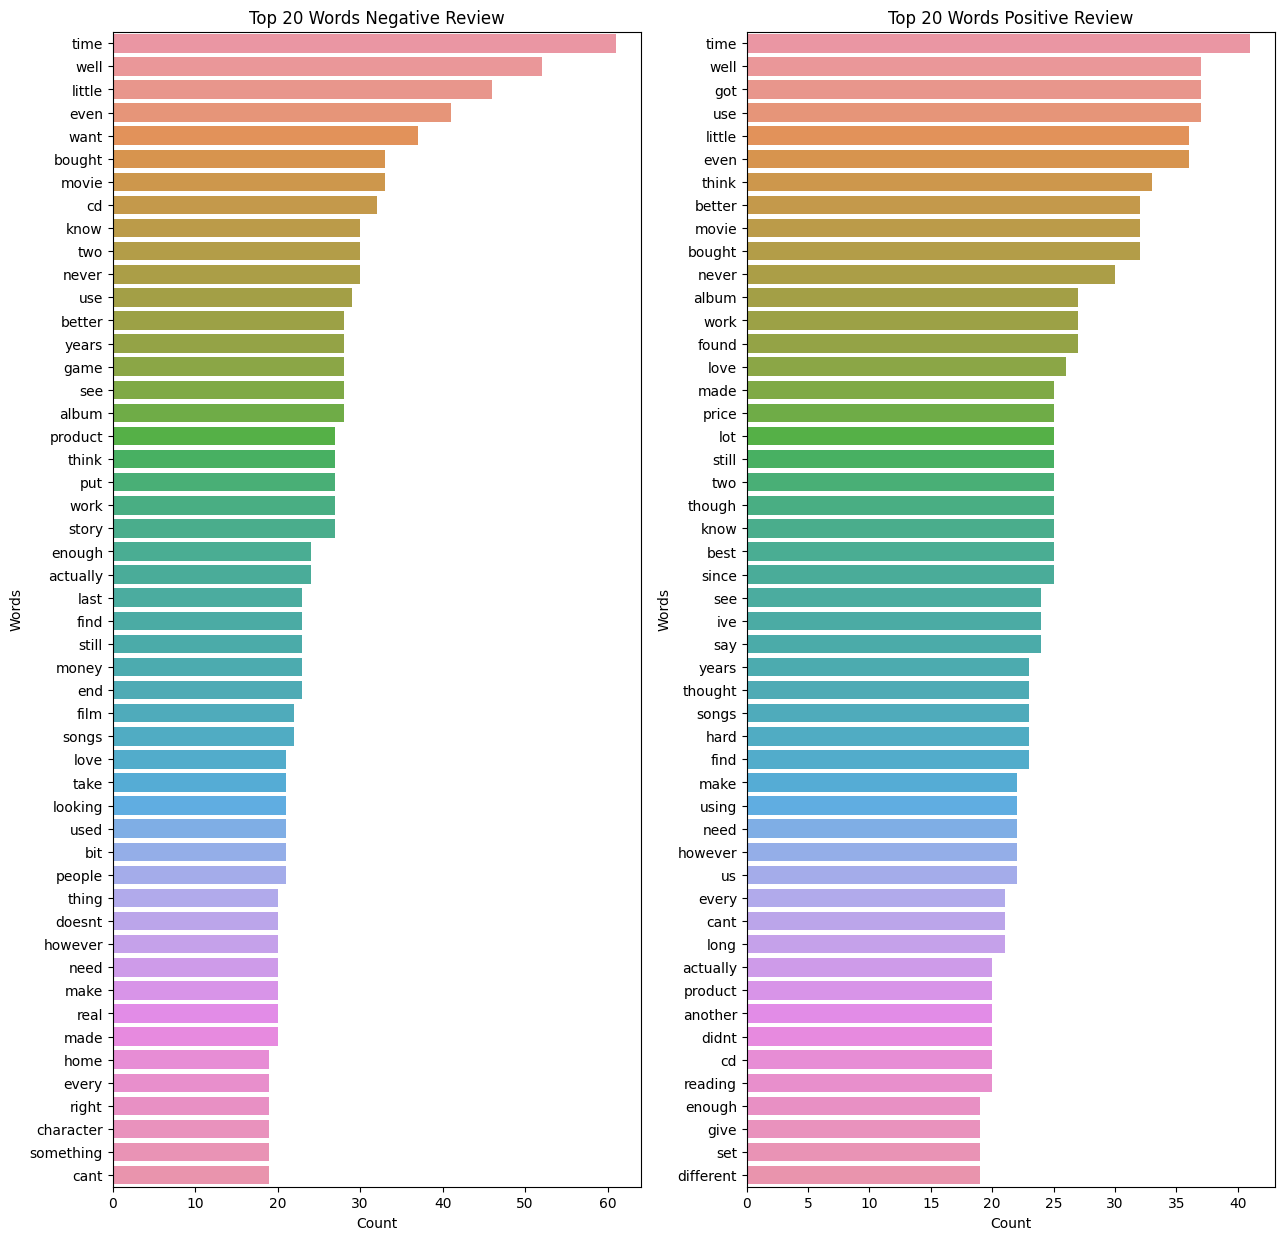

In [98]:
# Visualization
fig, ax =plt.subplots(1,2,figsize=(15,15))
sns.barplot(x='Count', y='Words', data =top_nr_list2, orientation= 'horizontal', ax=ax[0]).set(title= 'Top 20 Words Negative Review')
sns.barplot(x='Count', y='Words', data =top_pr_list2, orientation= 'horizontal', ax=ax[1]).set(title= 'Top 20 Words Positive Review')
plt.show

From the 2 visualizations above, we can obtain the following information: 
- There are words that appear in both reviews, i.e **time**, **well**, **little**, **even**, **movie**,etc. This makes the model misclassified.

---

# 12 - Model Saving

> This section explains the process of saving models and other files related to the results of the models that we created in the previous section.

In [99]:
# saving
with open('t.pickle', 'wb') as file_1:
    pickle.dump(t, file_1)

In [100]:
# Summary of Improved GRU Model
model_gruimp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 106, 128)          6450944   
                                                                 
 bidirectional (Bidirectiona  (None, 106, 64)          31104     
 l)                                                              
                                                                 
 gru_1 (GRU)                 (None, 8)                 1776      
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 6,483,833
Trainable params: 6,483,833
Non-trainable params: 0
______________________________________________

In [101]:
# Freeze Model
model_gruimp.trainable = False
model_gruimp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 106, 128)          6450944   
                                                                 
 bidirectional (Bidirectiona  (None, 106, 64)          31104     
 l)                                                              
                                                                 
 gru_1 (GRU)                 (None, 8)                 1776      
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 6,483,833
Trainable params: 0
Non-trainable params: 6,483,833
______________________________________________

In [102]:
# Save Model
model_gruimp.save('best_model.h5')

---

# 13 - Conclusion and Recommendation

> This section contains the conclusions of the analysis that has been carried out.

1. Based on Exploratory Data Analysis:
  - Both negative and positive reviews consist of 25,000 reviews each.
  - The key difference between positive and negative reviews is the attitude of the reviewer and their overall satisfaction with the product or service. Positive reviews reflect a positive experience, while negative reviews reflect a negative experience.
  - Negative reviews have, on average, more words than positive reviews.
  - Book, movie, cd and album are the products most frequently reviewed by amazon customers. The most frequent positive words used by amazon customers included good, great, love, best, and easy. The most common negative words used by amazon customers included bad, used and problem.

2. Based on Model Evaluation:
  - The selected model is the improved GRU model. The accuracy in classifying review types of this model is the highest compared to other models.
  - There are words that appear in both reviews, i.e book, one, like, good, really,etc. This makes the model misclassified.
  - The model we created has 80% accuracy. However, in the inference model, the model we created only achieved 70% accuracy for this dataset. This may be due to the presence of new words that are not included in the model's vocabulary.

3. Business Insights:
  - Sentiment analysis on Amazon reviews can provide businesses with valuable insights into customer sentiment and help shape future product development. By utilizing sentiment analysis, businesses can make data-driven decisions, address negative feedback quickly, and improve overall customer satisfaction.

4. Further improvement:
  - Reducing vocabulary, as there are words that appear in both reviews (adding words that appeared in both reviews into the stopwords). 




---

* NB : Untuk tokenization, textvectorization saya menggunakan library yang dari tensorflow soalnya tadinya modelnya ga bisa predict angka 1 :(((((